## Процесс решения задачи

Решение почти любой DS задачи в продуктовой аналитике можно разбить на следующие этапы:
1) Проанализировать задачу, понять к какому виду и классу обучения она относится. Вместе с бизнесом выбрать метрику

2) EDA (exploratory data analysis) - процесс когда мы изучаем качество данных, признаки, их распределение и связь с целевой(целевыми переменными)

3) Предобработка данных (обработка пропусков, кодирование/создание новых признаков, очистка данных от выбросов и т.д.)

4) Обучение и оптимизация моделей

5) Валидация результатов

## Данные и задача

Рассмотрим все этапы выше на примере задачи предсказания оттока пользователя. 

Ссылка на данные: https://www.kaggle.com/c/customer-churn-prediction-2020/data



In [1]:
!pip freeze requiements.txt

anyio==4.3.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.15.0
beautifulsoup4==4.12.3
bleach==6.1.0
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
executing==2.0.1
fastjsonschema==2.19.1
fonttools==4.51.0
fqdn==1.5.1
h11==0.14.0
httpcore==1.0.5
httpx==0.27.0
idna==3.7
ipykernel==6.29.4
ipython==8.24.0
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
json5==0.9.25
jsonpointer==2.4
jsonschema==4.22.0
jsonschema-specifications==2023.12.1
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.1
jupyter_core==5.7.2
jupyter_server==2.14.0
jupyter_server_terminals==0.5.3
jupyterlab==4.1.8
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.1
kiwisolver==1.4.5
MarkupSafe==2.1.5
matplotlib==3.8.4
matplotlib-inline==0.1.7
mistune==3.0.2
nbclient==0.10.0
nbconvert==7.16.4
nbformat==5.10.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('LTV.csv')

train_data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2964,VE98553,Oregon,4666.643522,No,Premium,Bachelor,2/28/11,Employed,M,60466,...,3,0,1,Personal Auto,Personal L3,Offer2,Agent,784.186389,Four-Door Car,Large
487,PH26378,California,6019.960469,No,Extended,College,1/31/11,Unemployed,M,0,...,28,0,4,Personal Auto,Personal L3,Offer1,Agent,662.400000,Four-Door Car,Medsize
6331,LT24477,California,8605.495006,No,Basic,High School or Below,2/17/11,Employed,M,47589,...,44,1,7,Personal Auto,Personal L2,Offer1,Agent,110.529874,SUV,Medsize
1416,ZR77995,California,3832.898507,No,Extended,College,2/20/11,Employed,M,97729,...,21,0,1,Personal Auto,Personal L3,Offer2,Web,97.176153,Four-Door Car,Medsize
6195,YI70563,California,2780.845565,No,Basic,Bachelor,2/25/11,Employed,M,88704,...,78,0,1,Personal Auto,Personal L3,Offer2,Call Center,259.714887,Two-Door Car,Small
8150,OP70207,Oregon,10506.884130,No,Extended,College,2/14/11,Employed,M,37934,...,58,1,8,Personal Auto,Personal L3,Offer1,Call Center,385.440163,Sports Car,Medsize
3445,UL10037,Oregon,10484.915350,Yes,Extended,College,2/1/11,Employed,F,61108,...,93,0,2,Corporate Auto,Corporate L1,Offer2,Agent,49.451117,Four-Door Car,Medsize
2733,XZ23352,California,3839.746159,No,Basic,High School or Below,2/13/11,Unemployed,F,0,...,38,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,763.200000,SUV,Small
1558,RP30093,Oregon,49221.430730,No,Premium,Bachelor,1/23/11,Employed,F,63035,...,97,0,2,Personal Auto,Personal L3,Offer1,Agent,734.400000,SUV,Medsize
5638,AM94127,Oregon,5157.642282,No,Basic,College,2/16/11,Employed,M,93303,...,96,0,5,Corporate Auto,Corporate L3,Offer1,Branch,40.757983,Four-Door Car,Medsize


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [5]:
X = train_data.drop('Customer Lifetime Value', axis = 1)
y = train_data['Customer Lifetime Value']

## Выделим численные признаки от остальных

In [7]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [8]:
cols_and_type

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

In [9]:
train_data[num_cols].describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Построим графики, посмотрим на распределение признаков

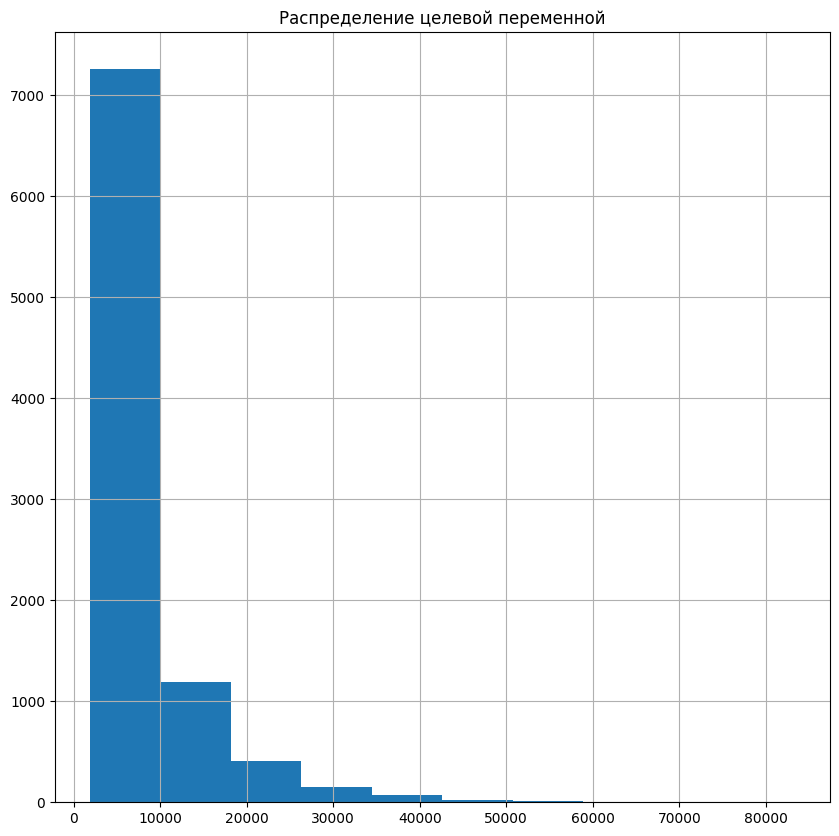

In [10]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Customer Lifetime Value'].hist()

plt.show()

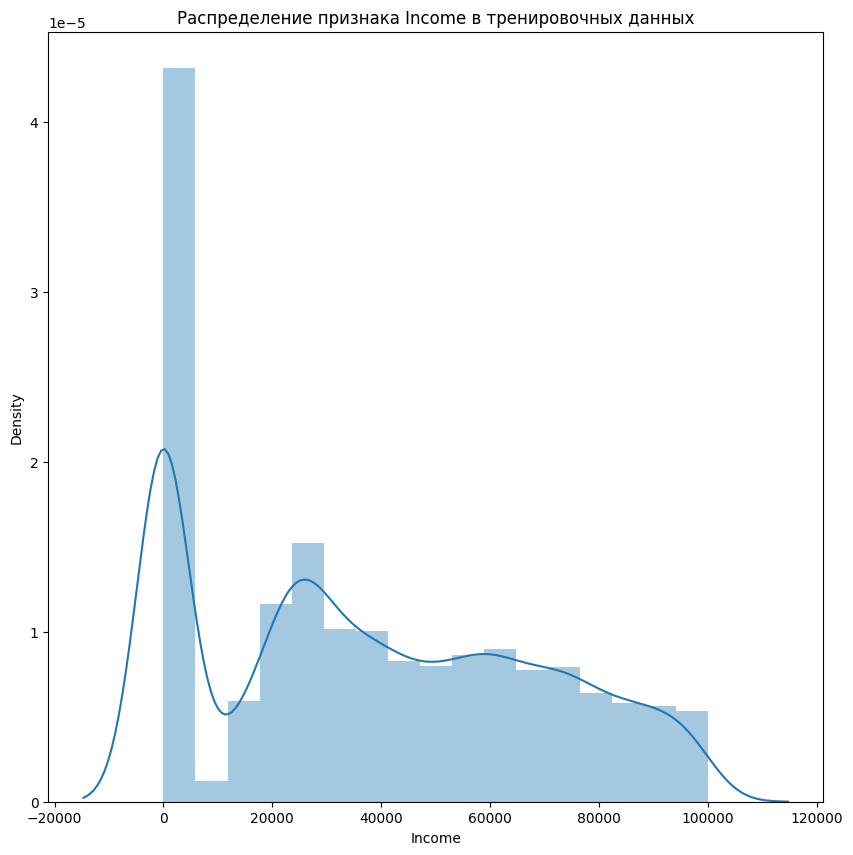

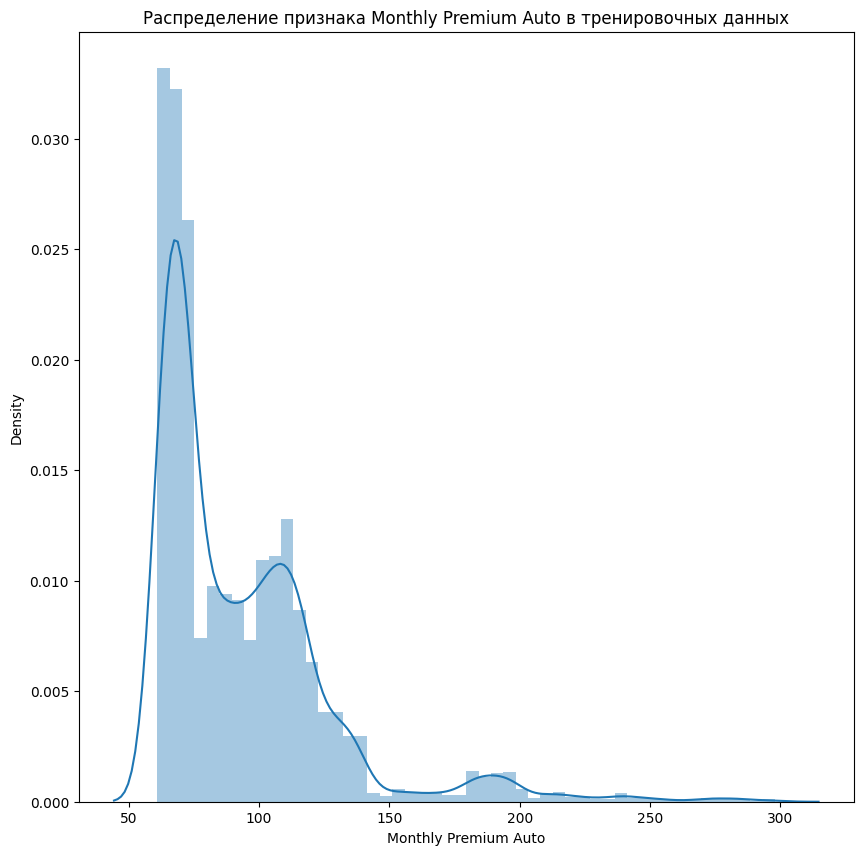

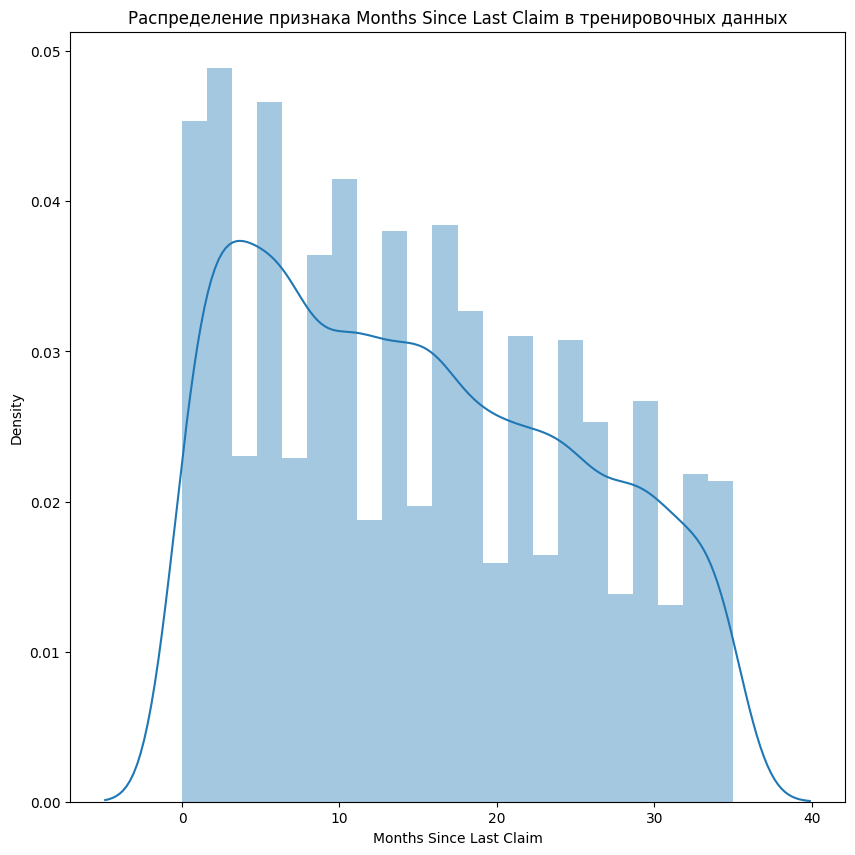

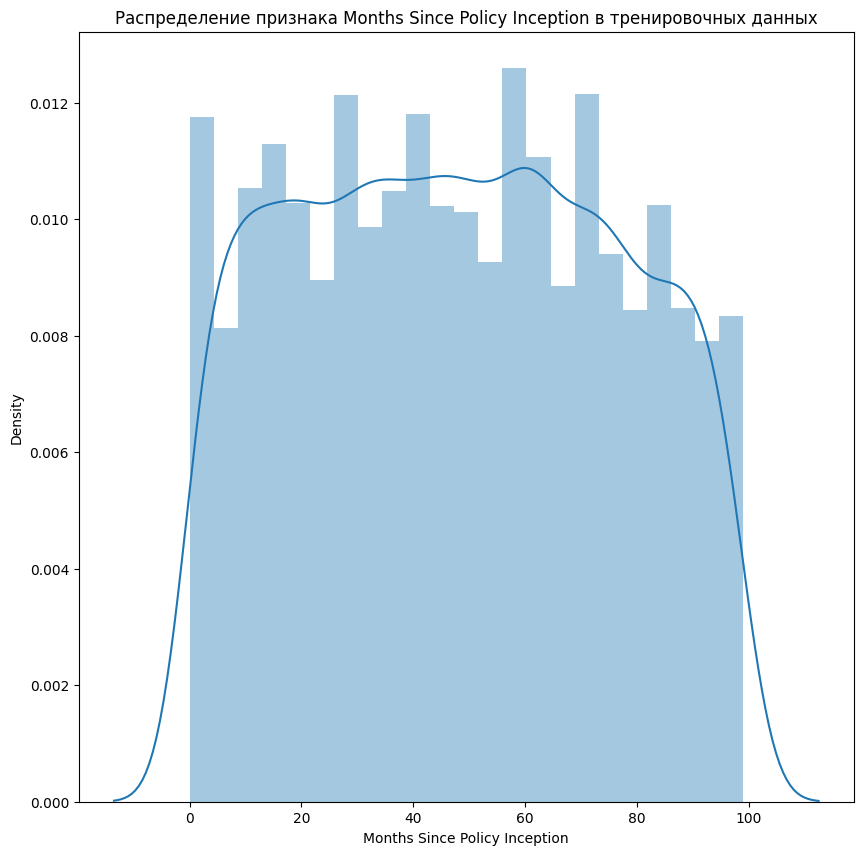

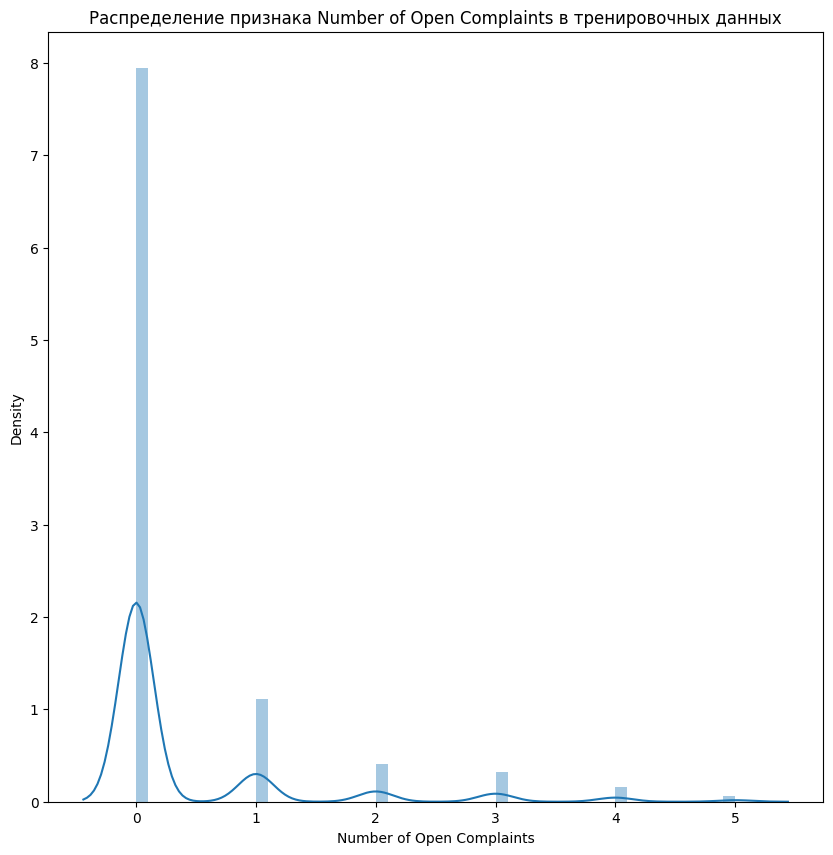

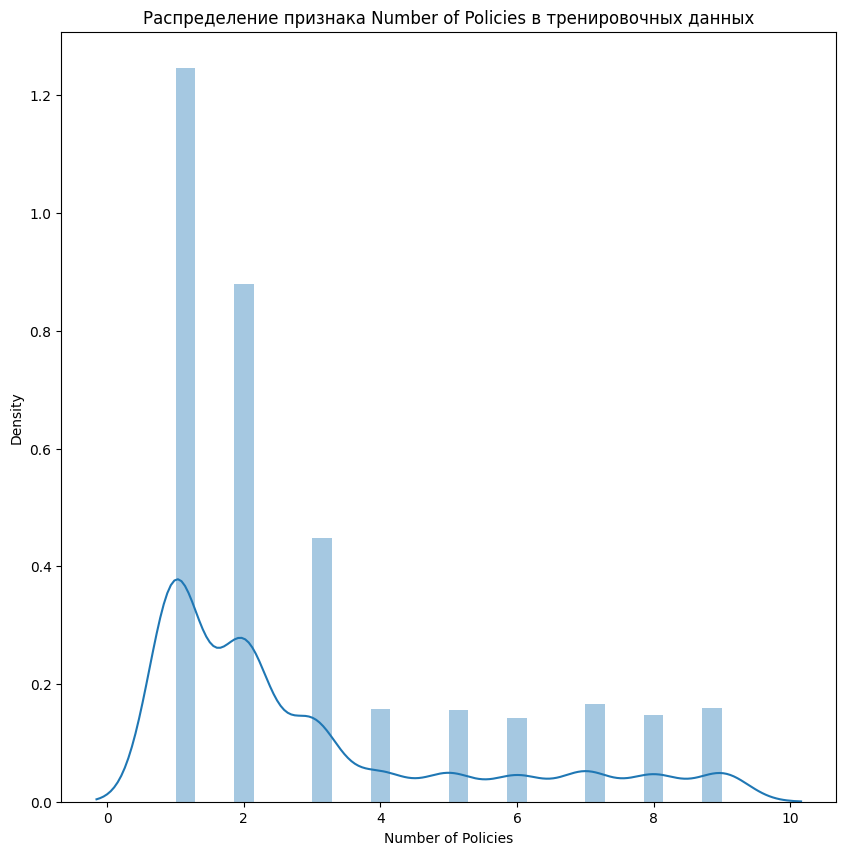

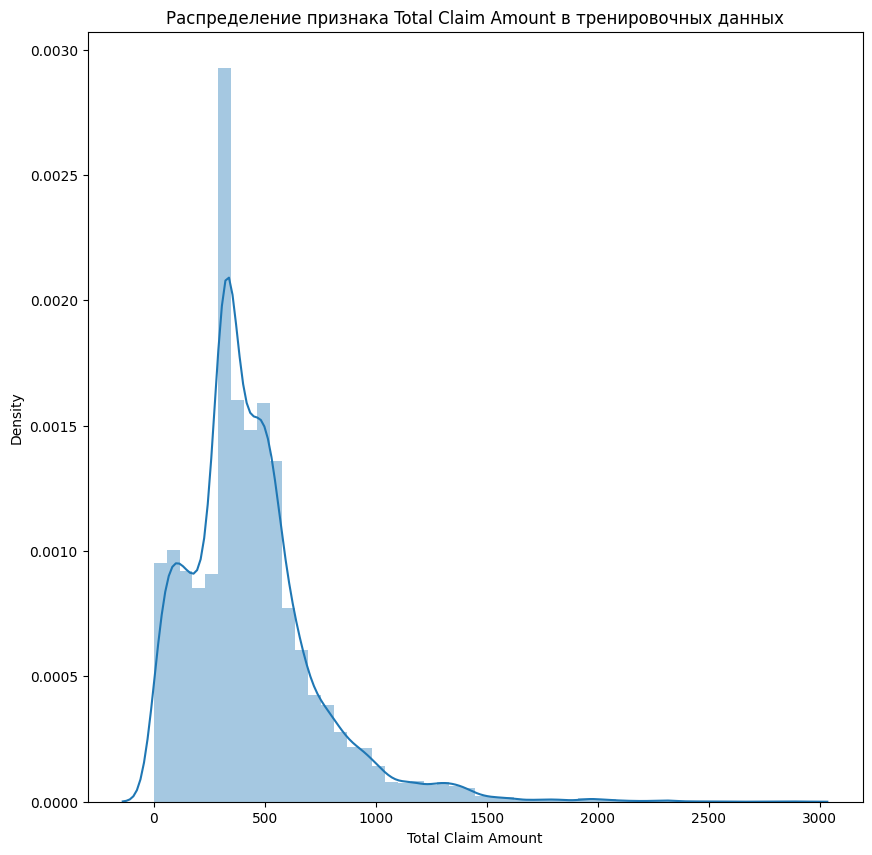

In [11]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

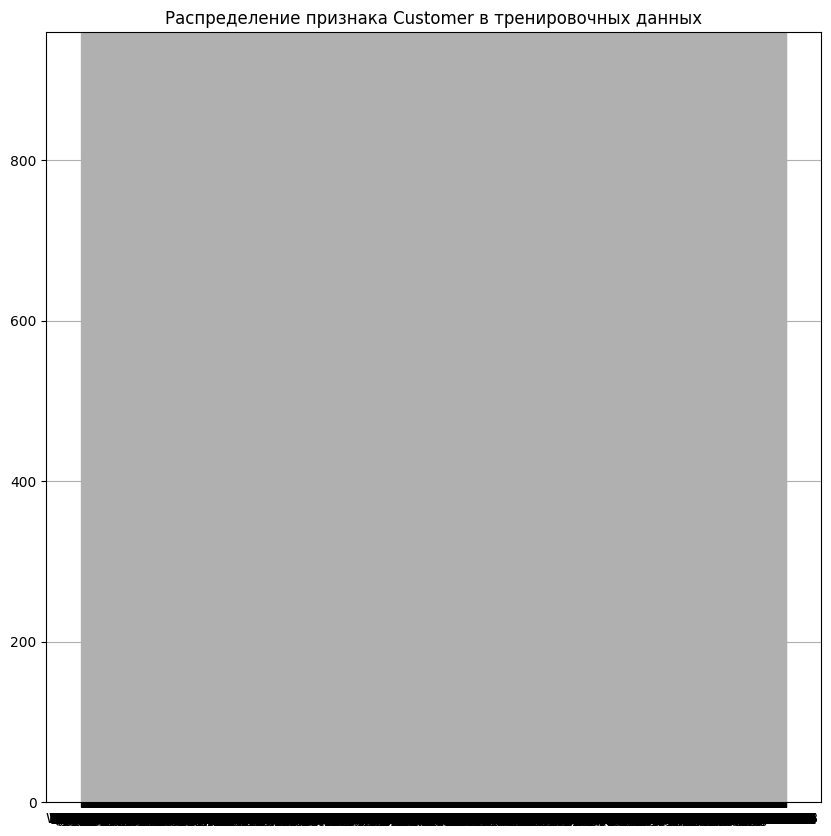

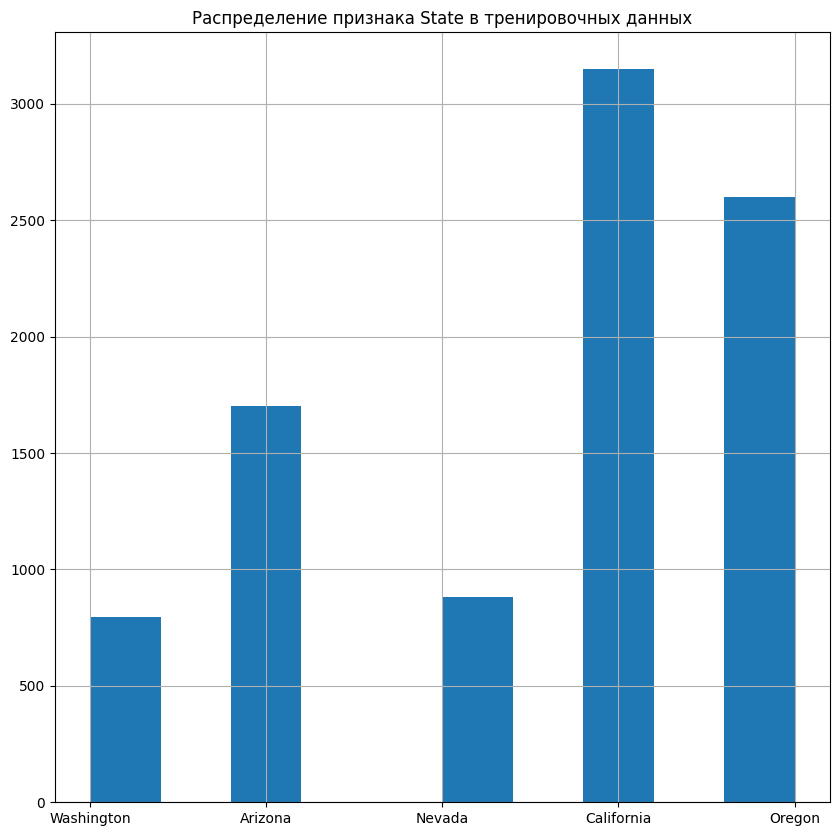

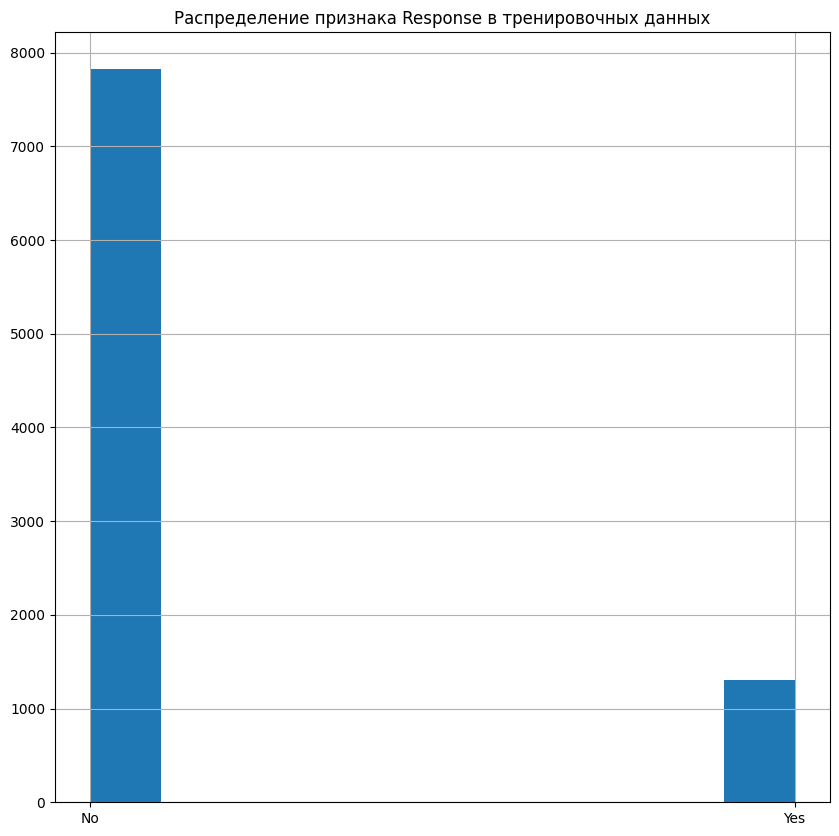

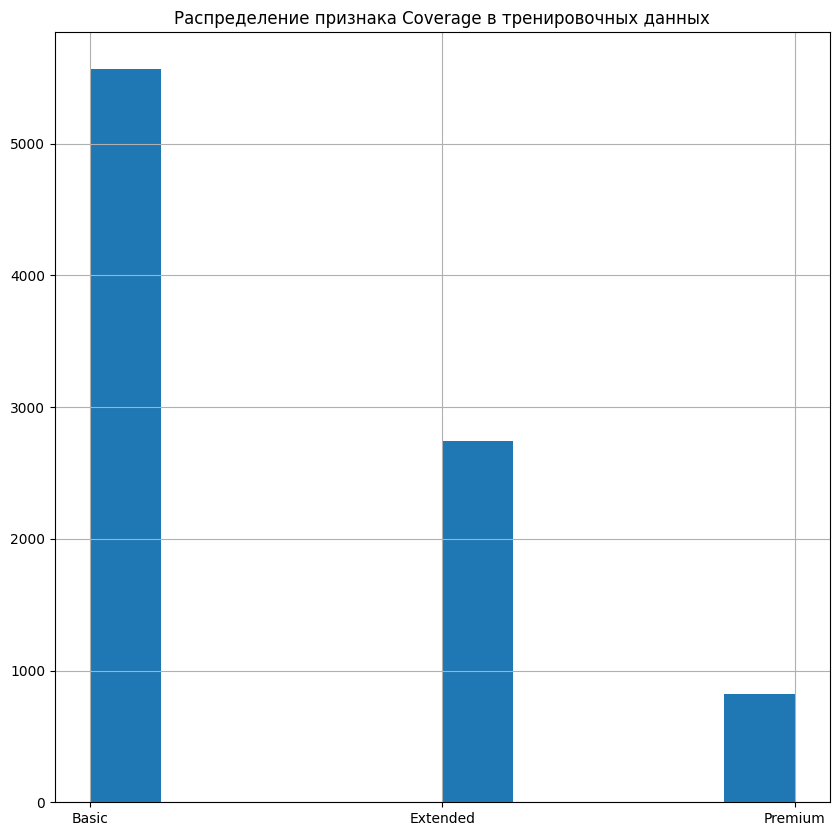

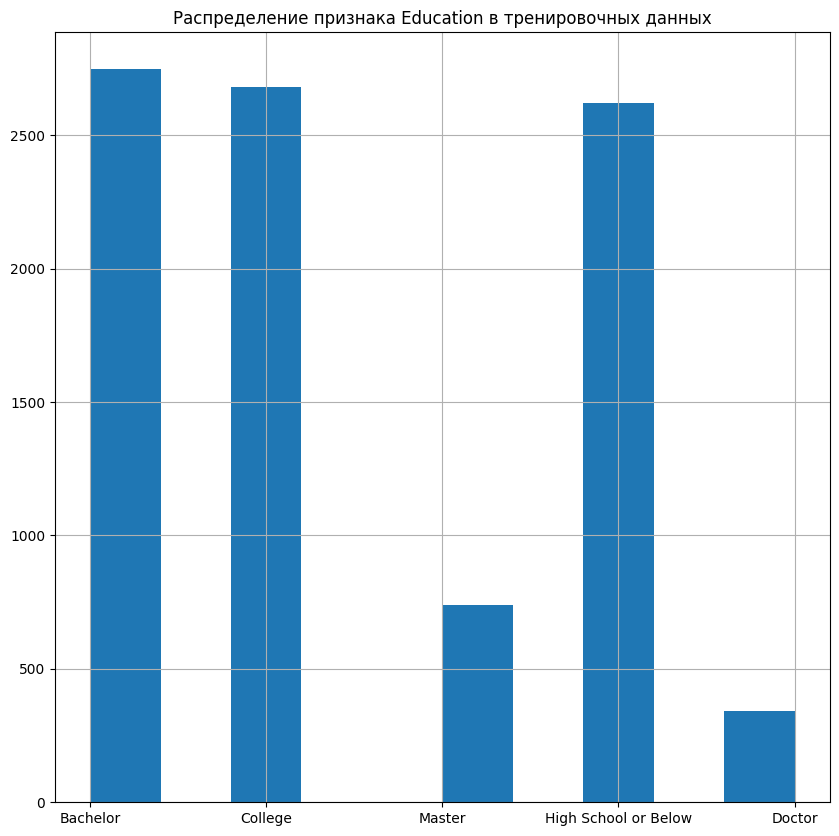

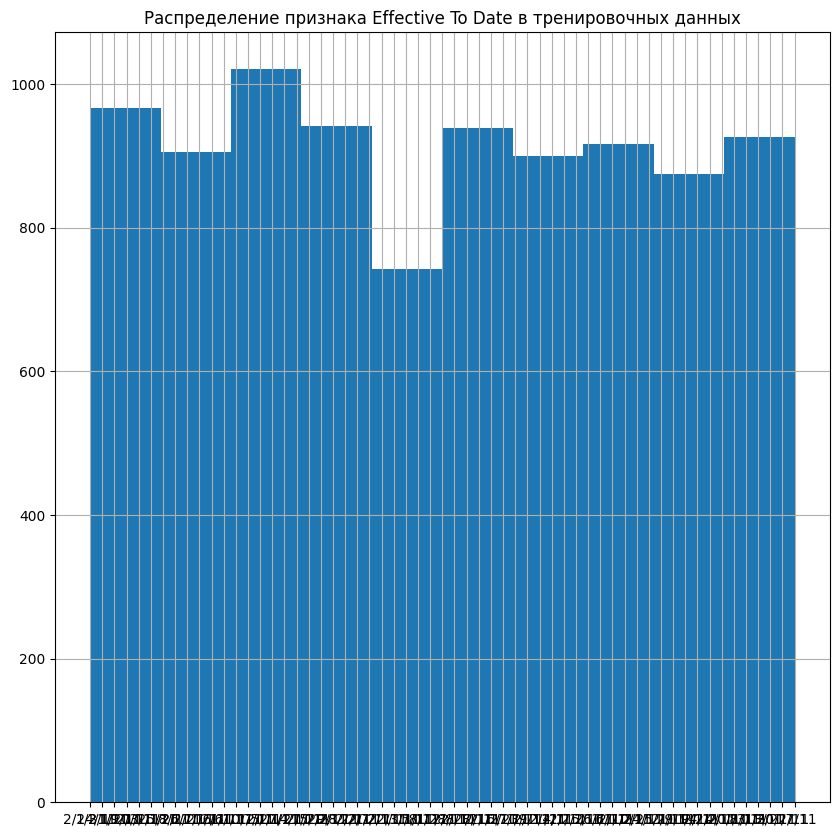

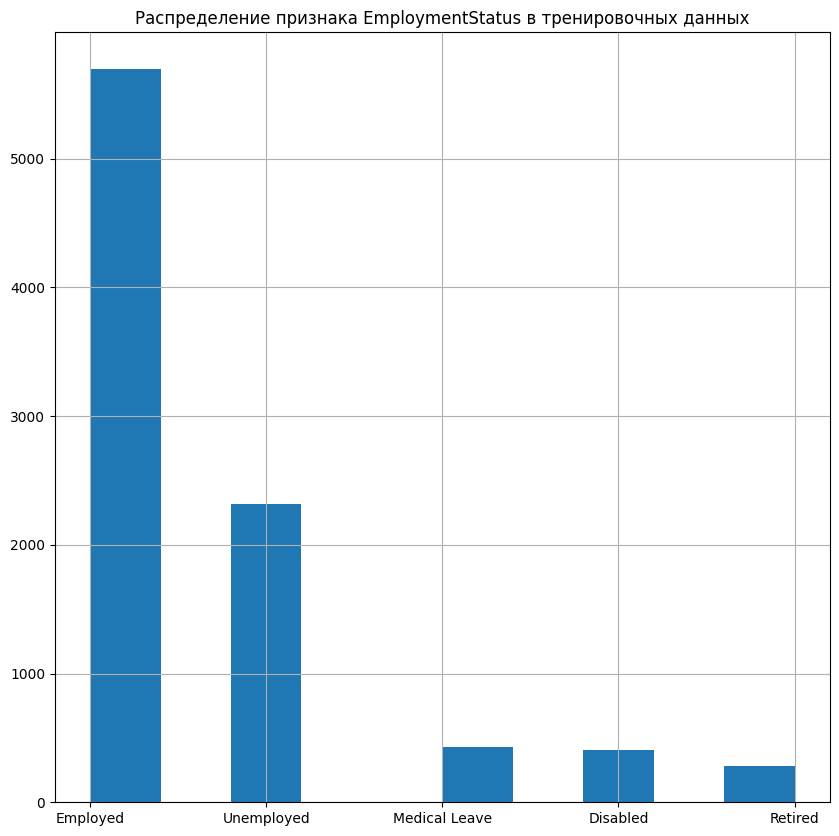

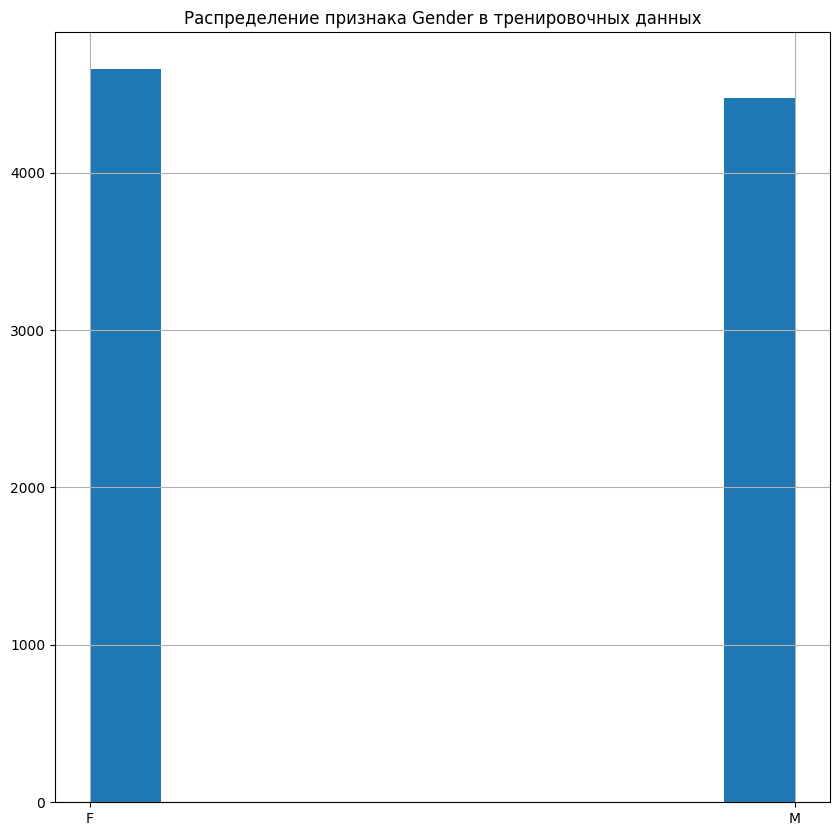

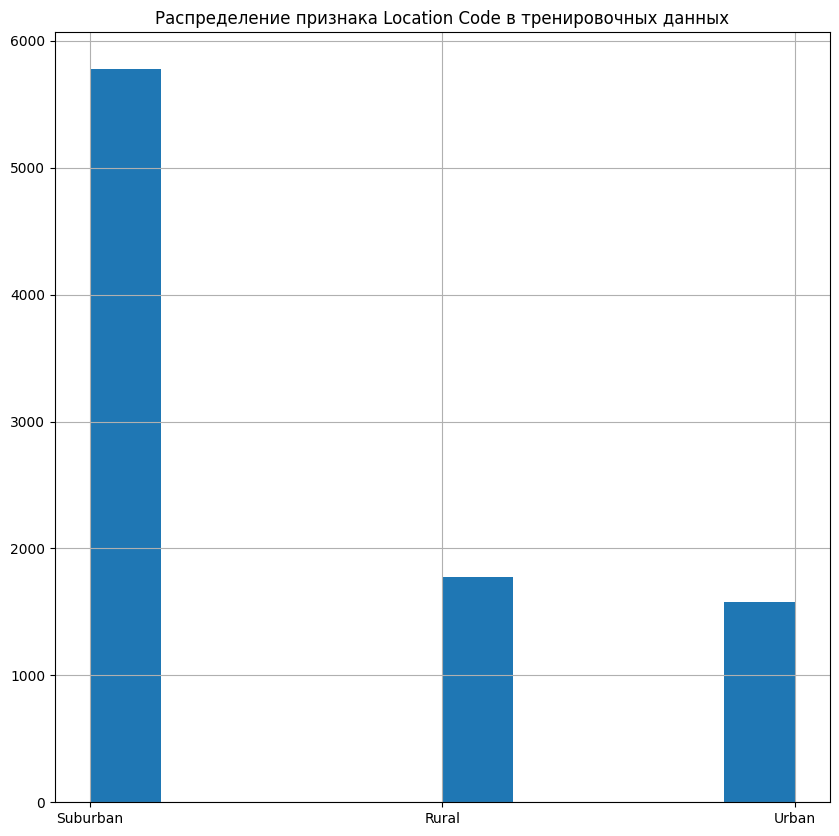

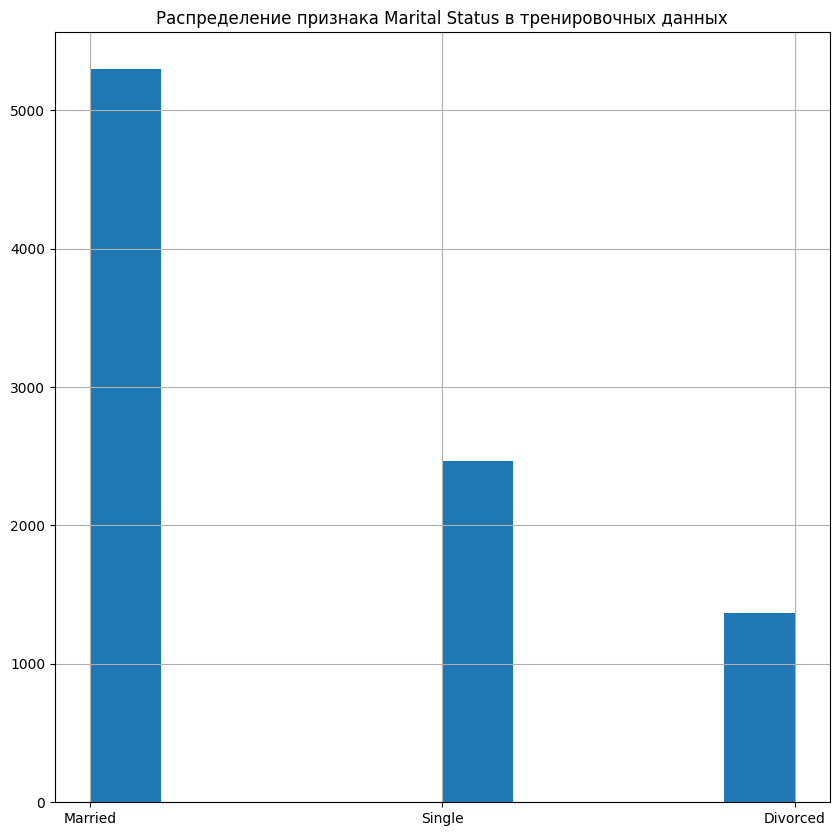

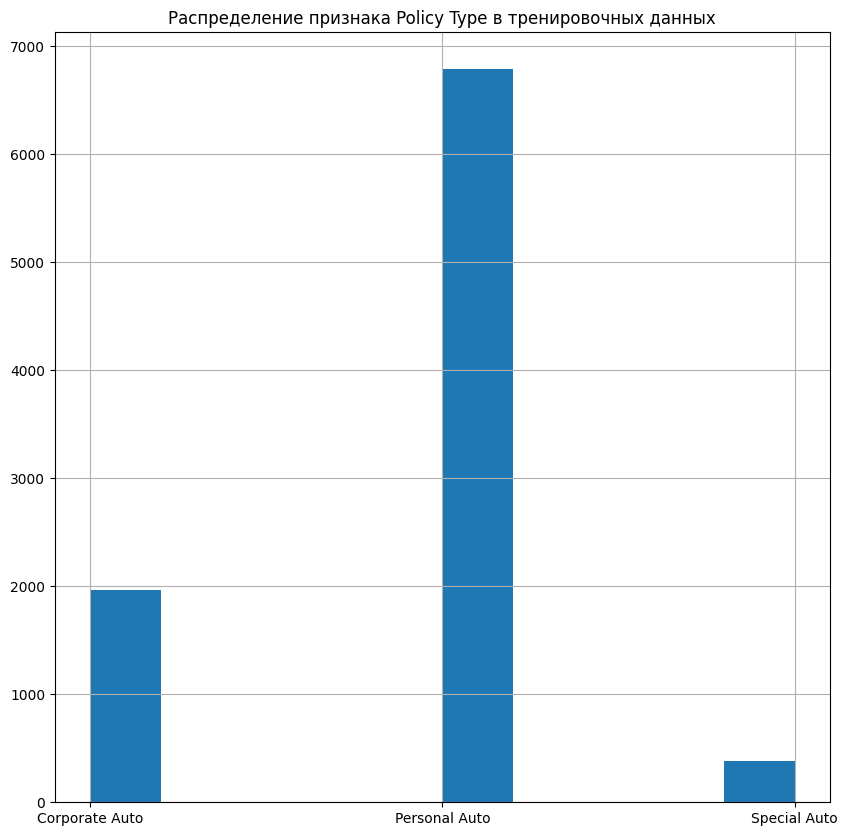

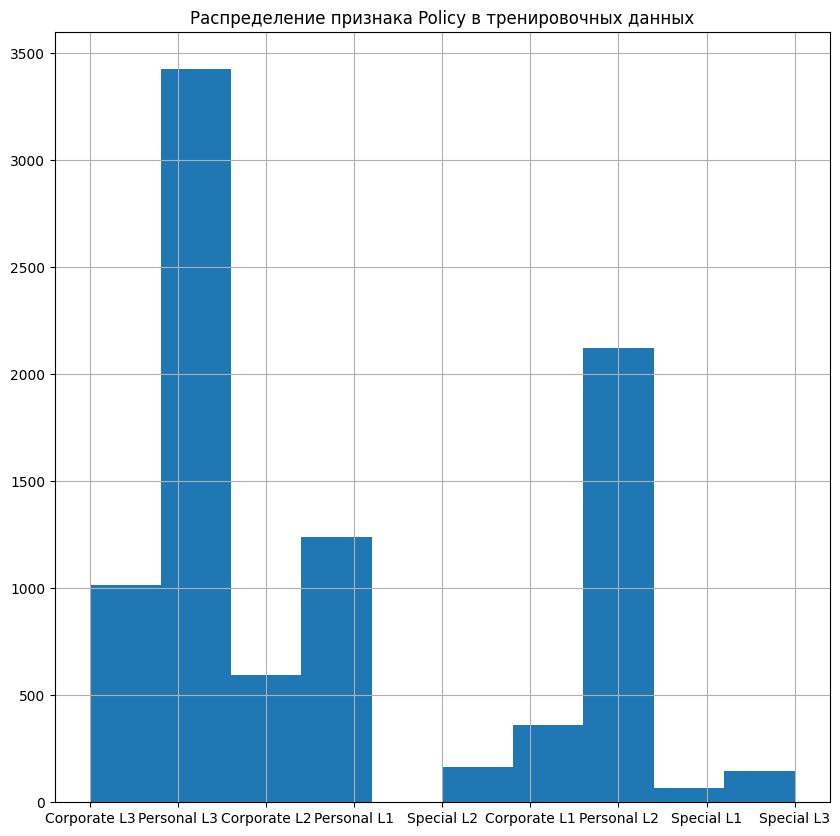

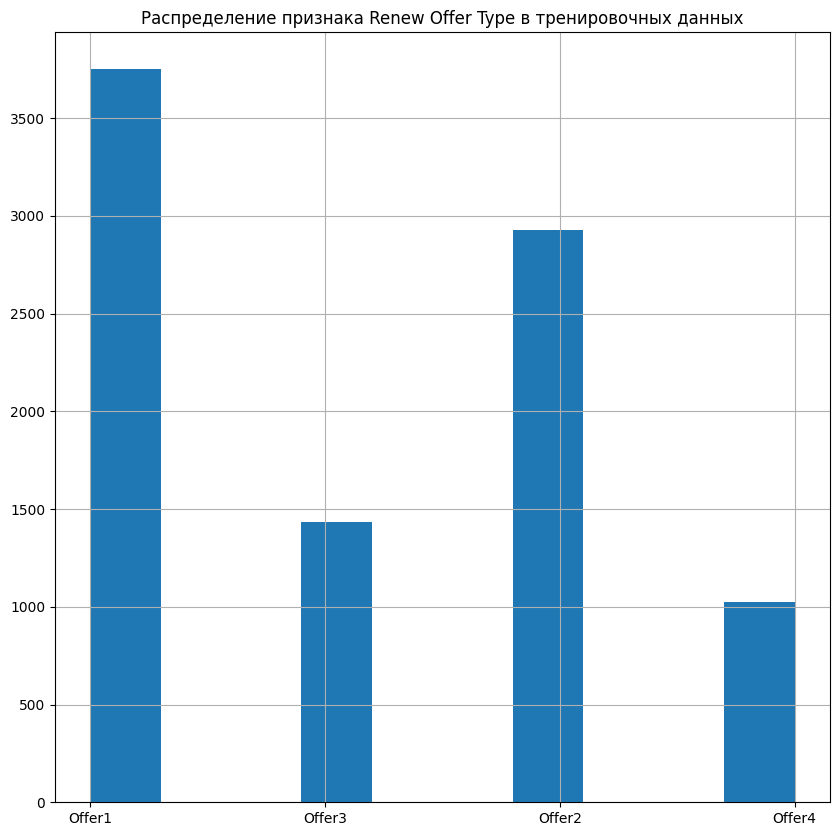

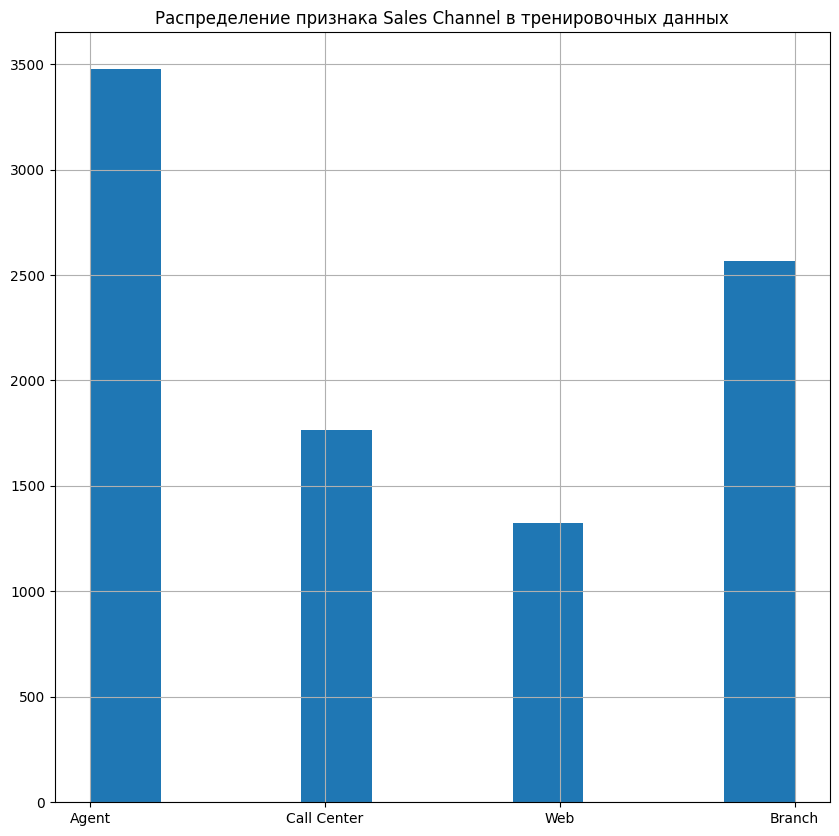

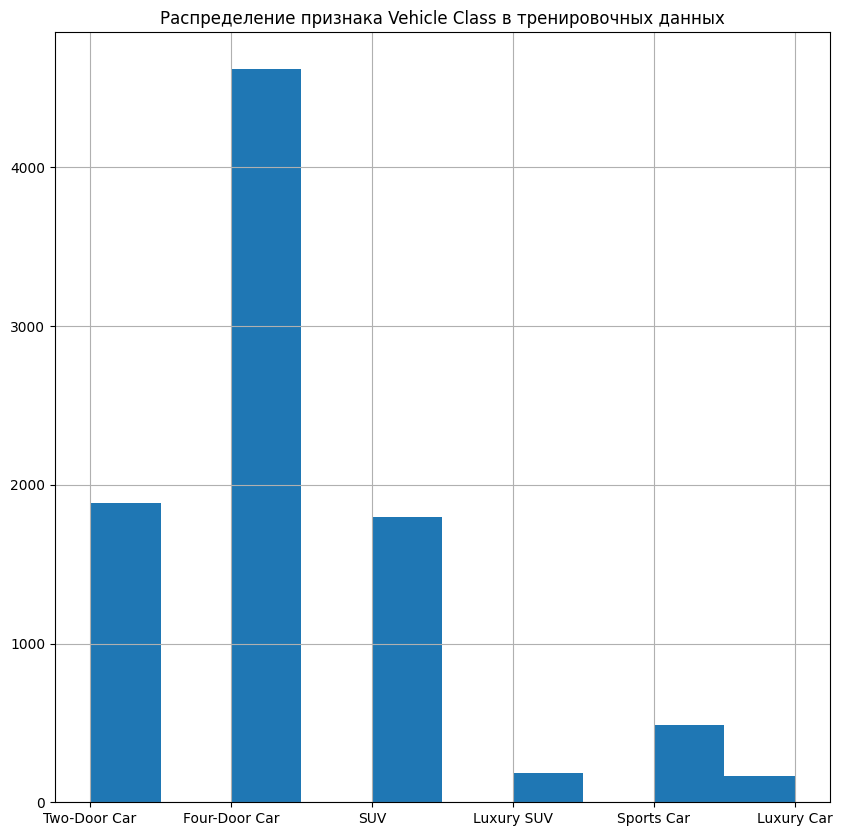

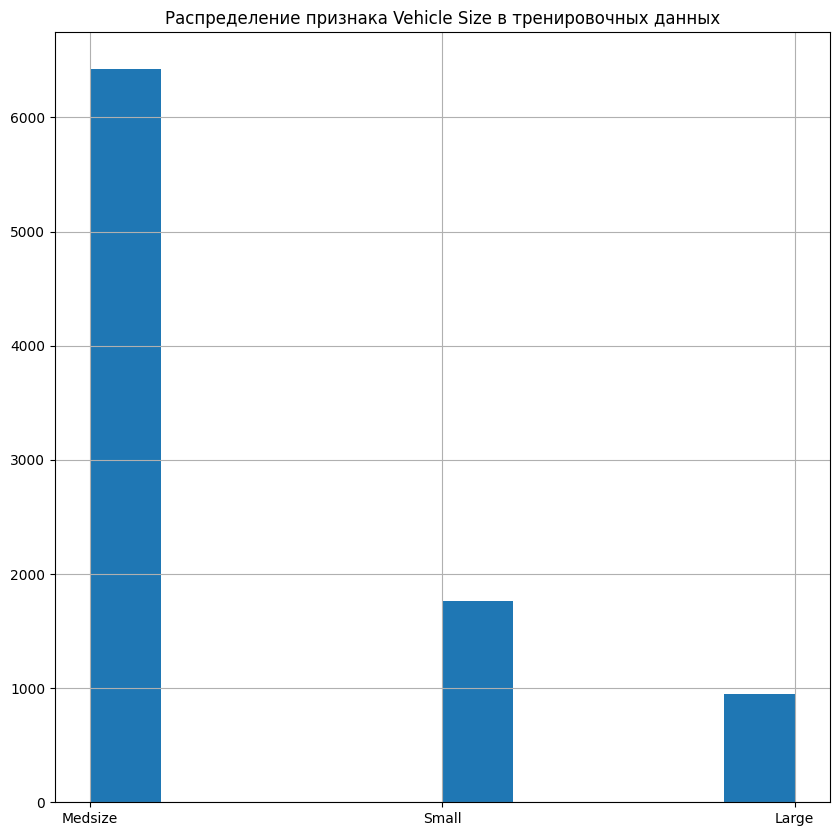

In [12]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist()

## Сравнение мужчин и женщин

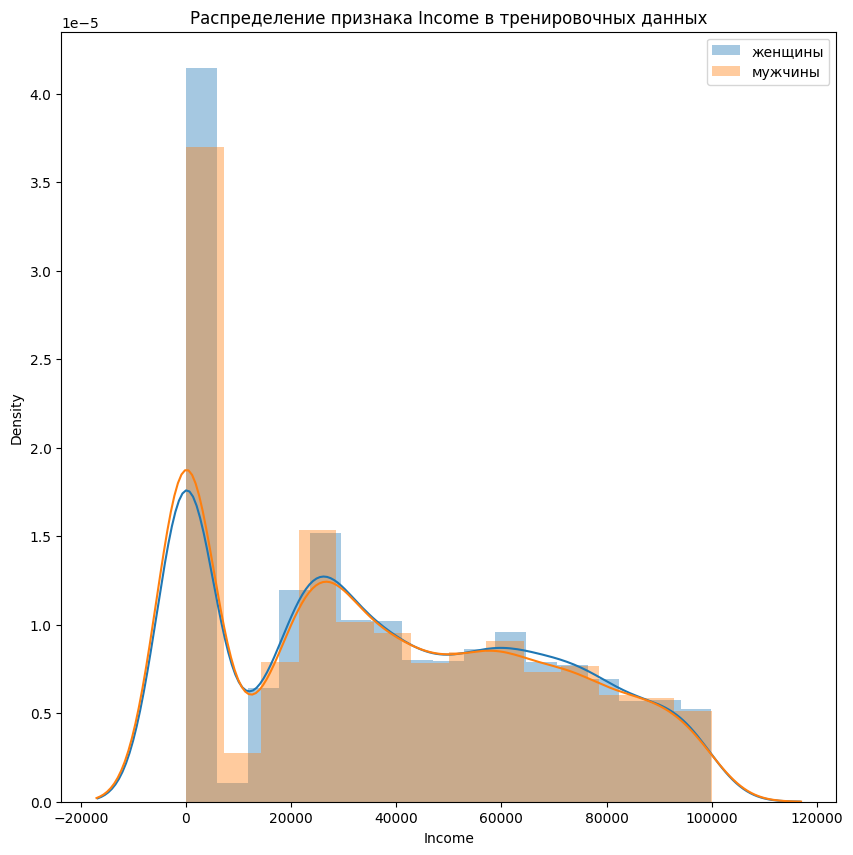

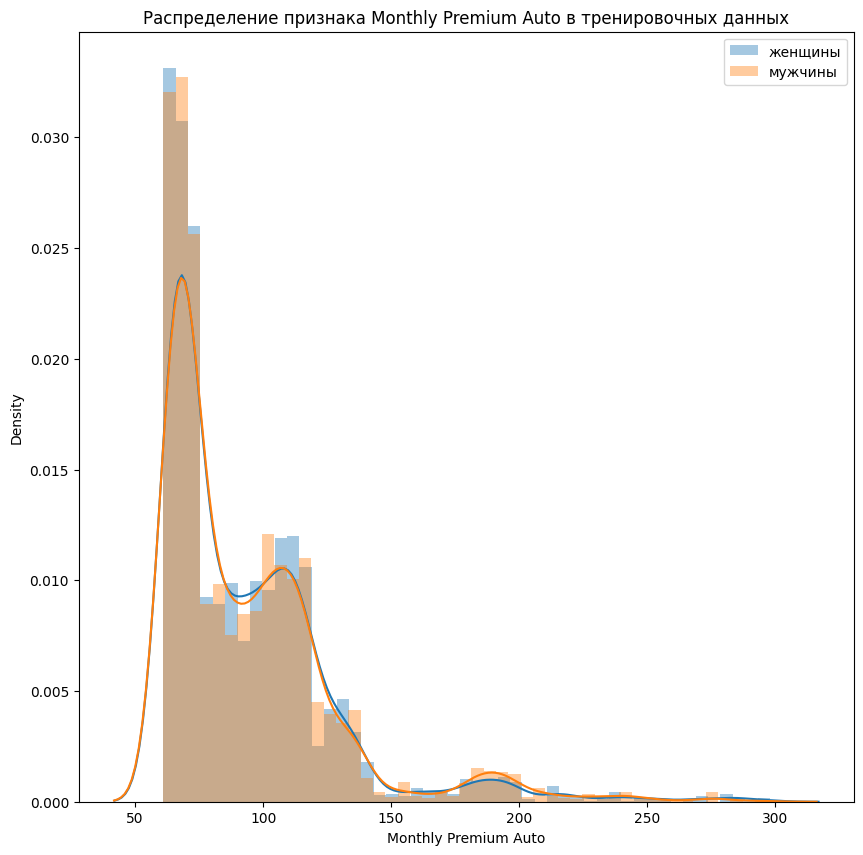

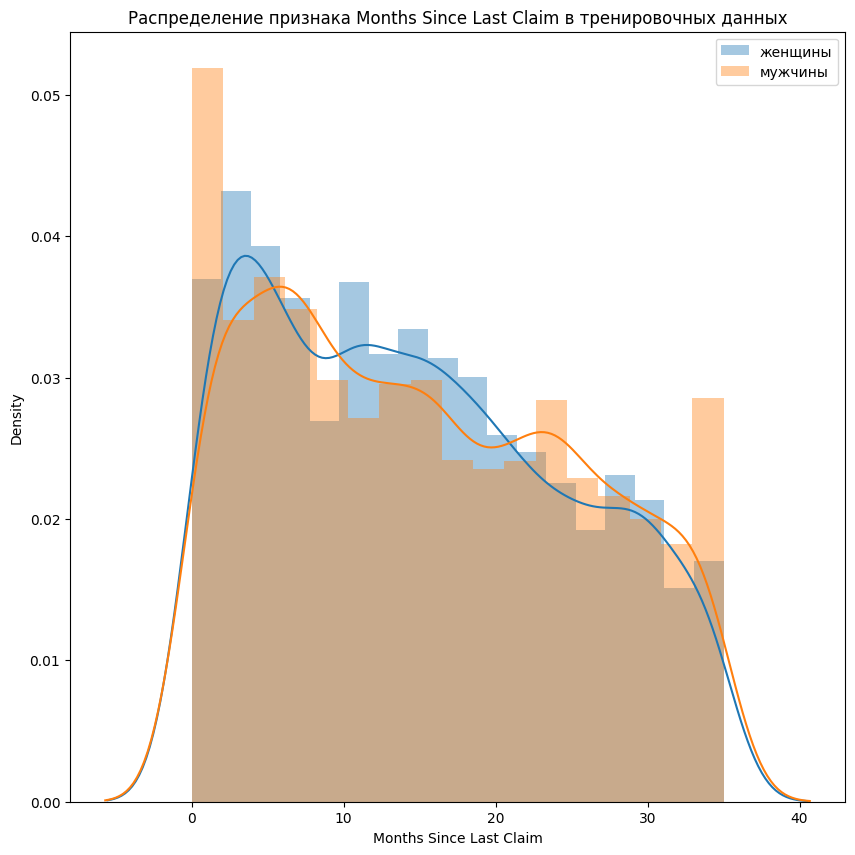

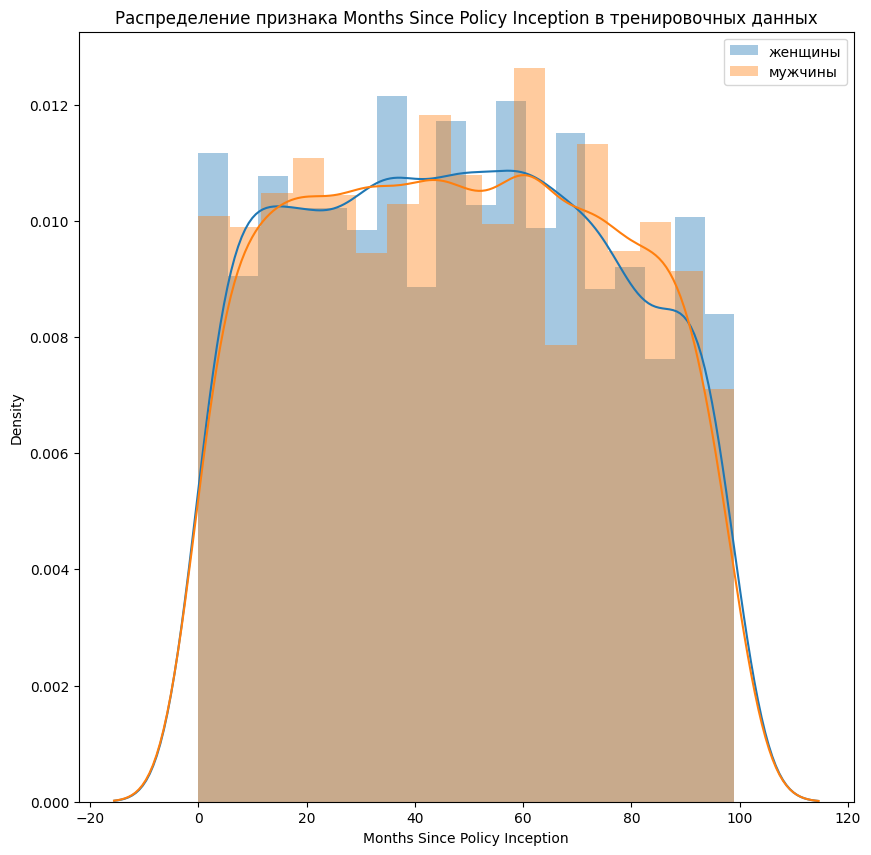

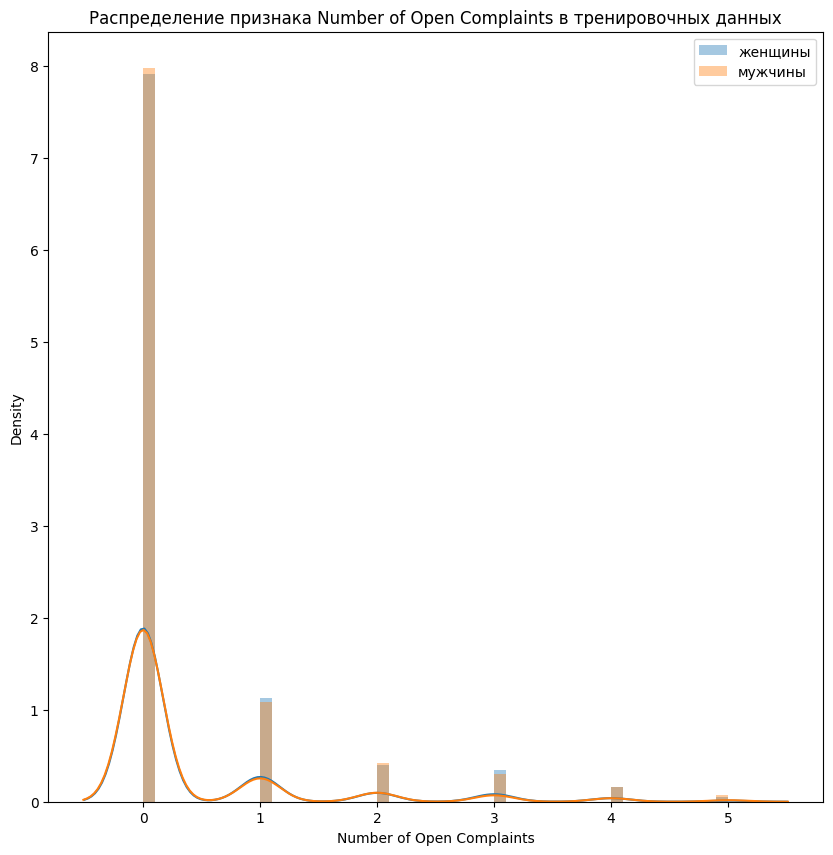

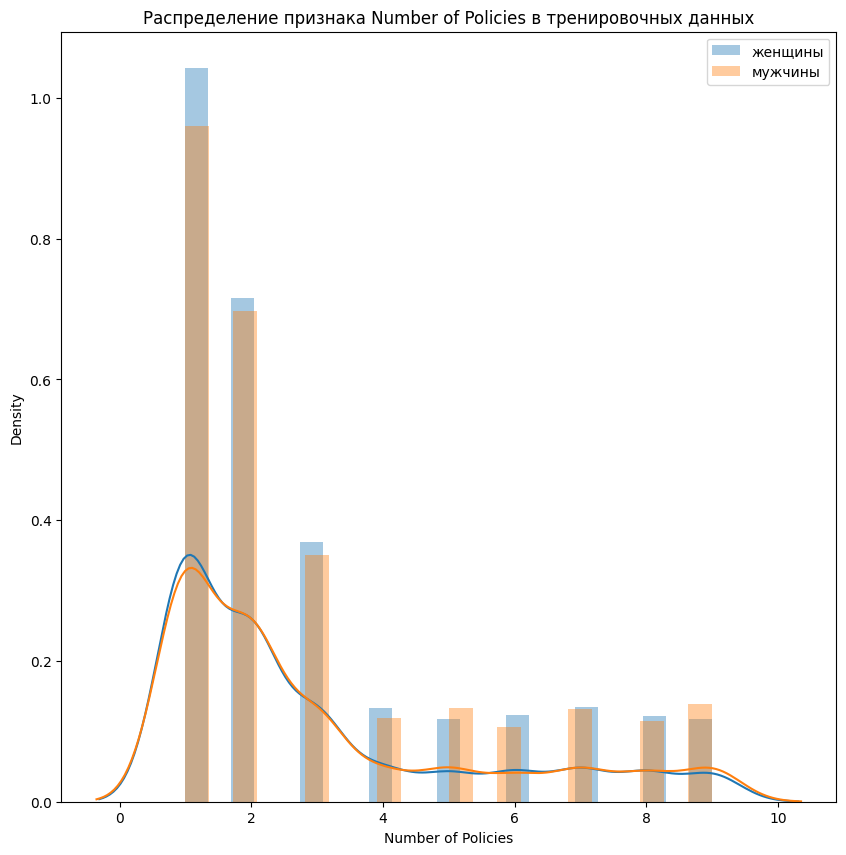

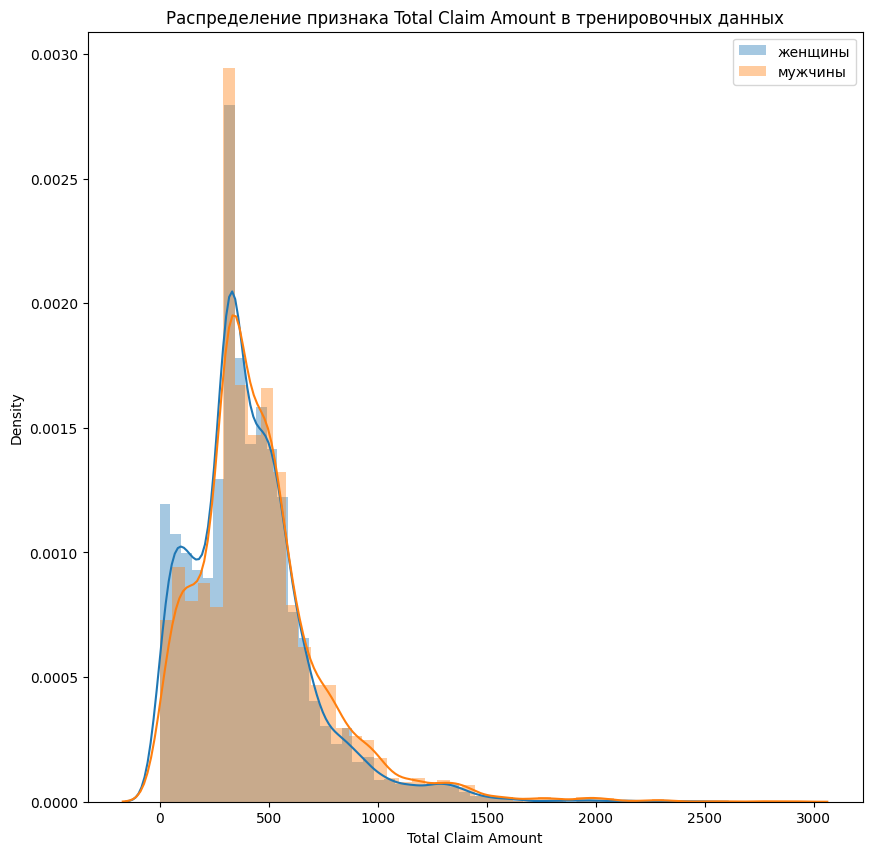

In [13]:
femaly = train_data[train_data['Gender'] == 'F']
man = train_data[train_data['Gender'] == 'M']


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(femaly[col], label = 'женщины')
    sns.distplot(man[col], label = 'мужчины')   
    plt.legend()

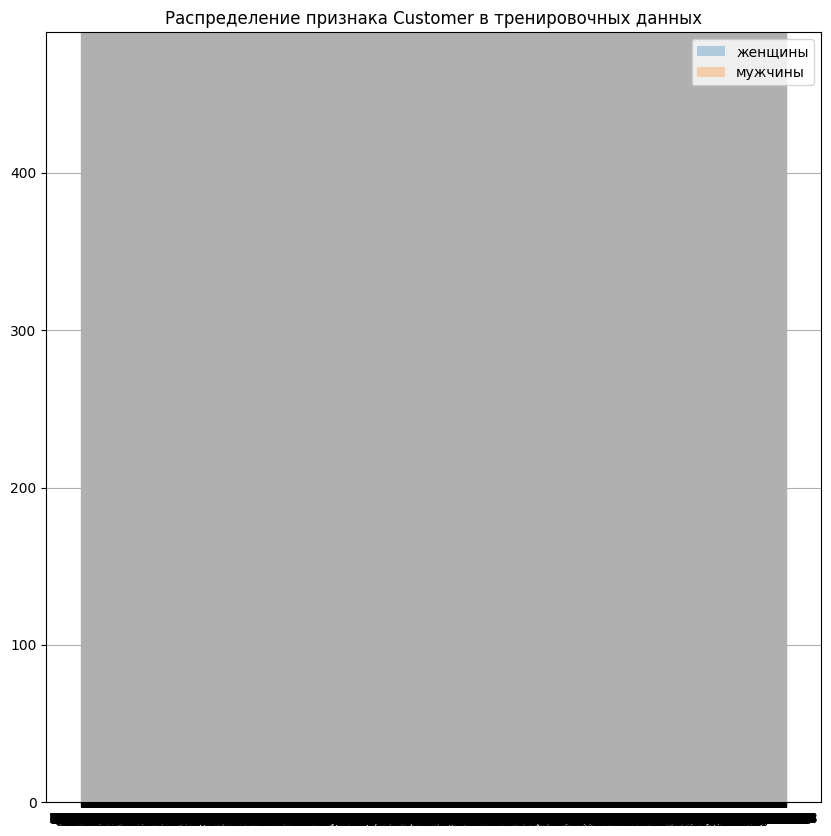

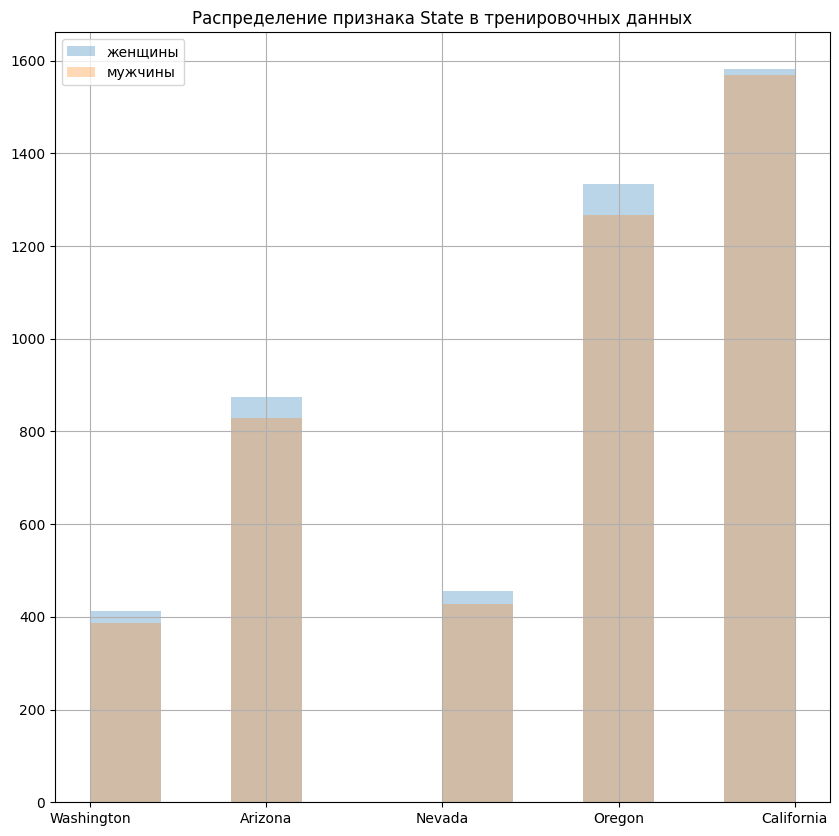

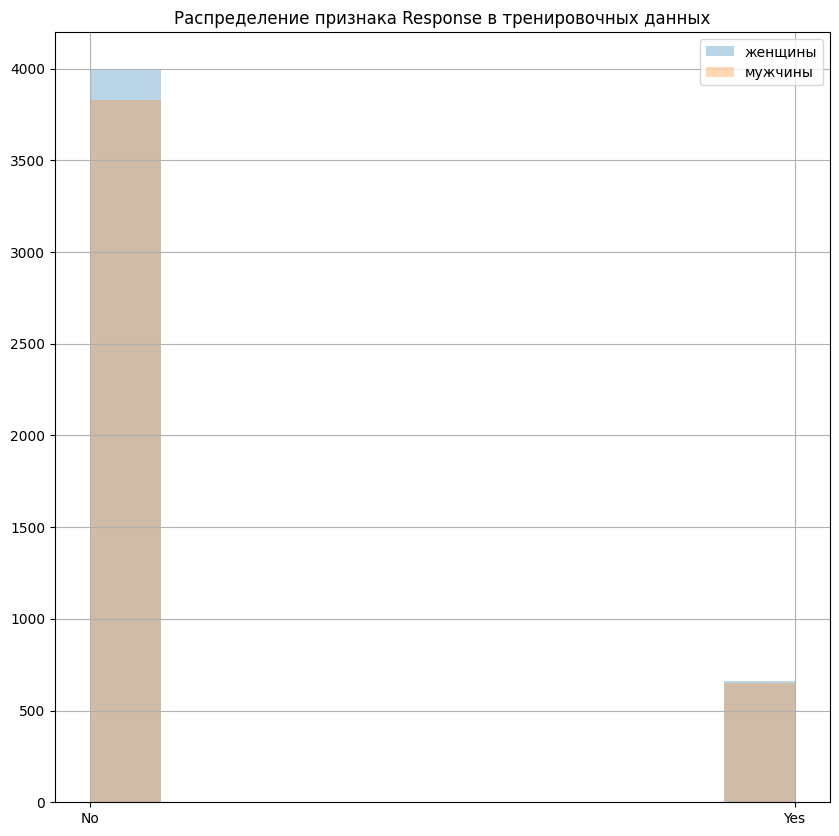

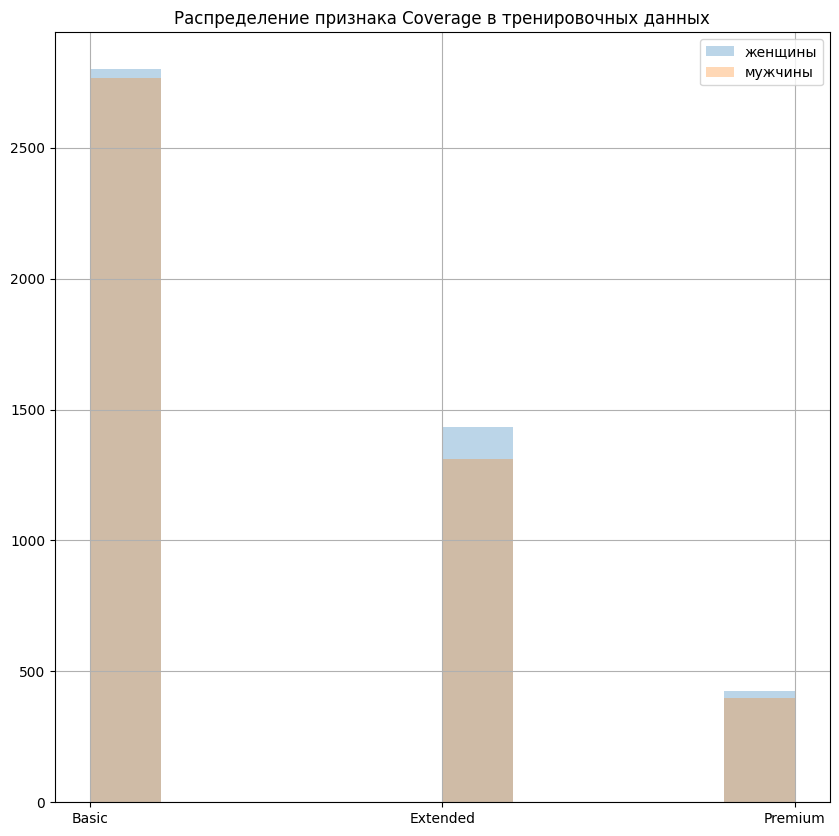

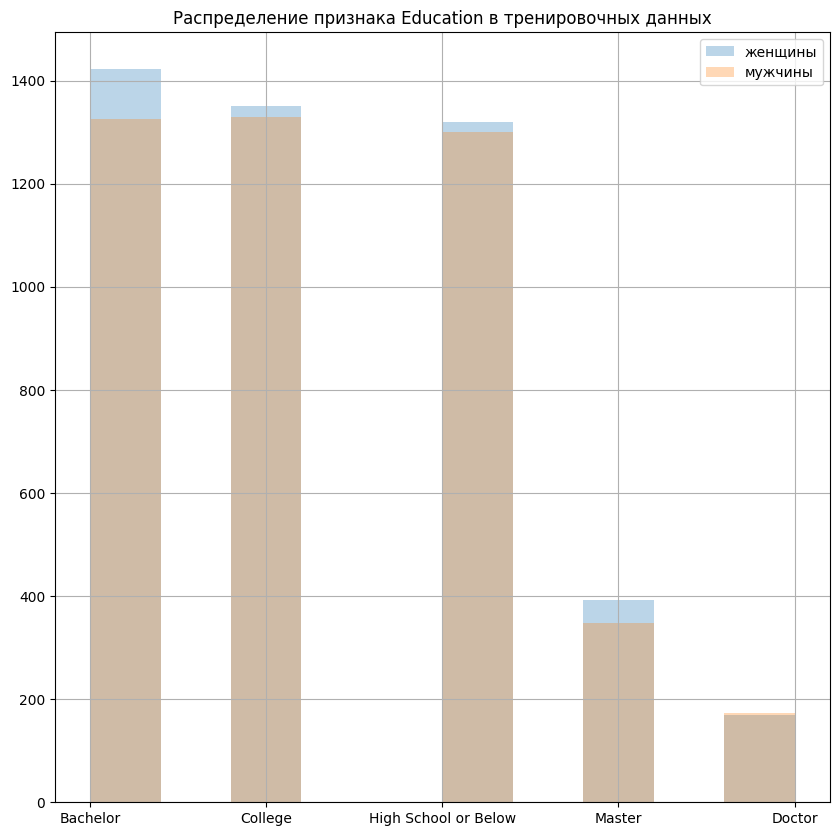

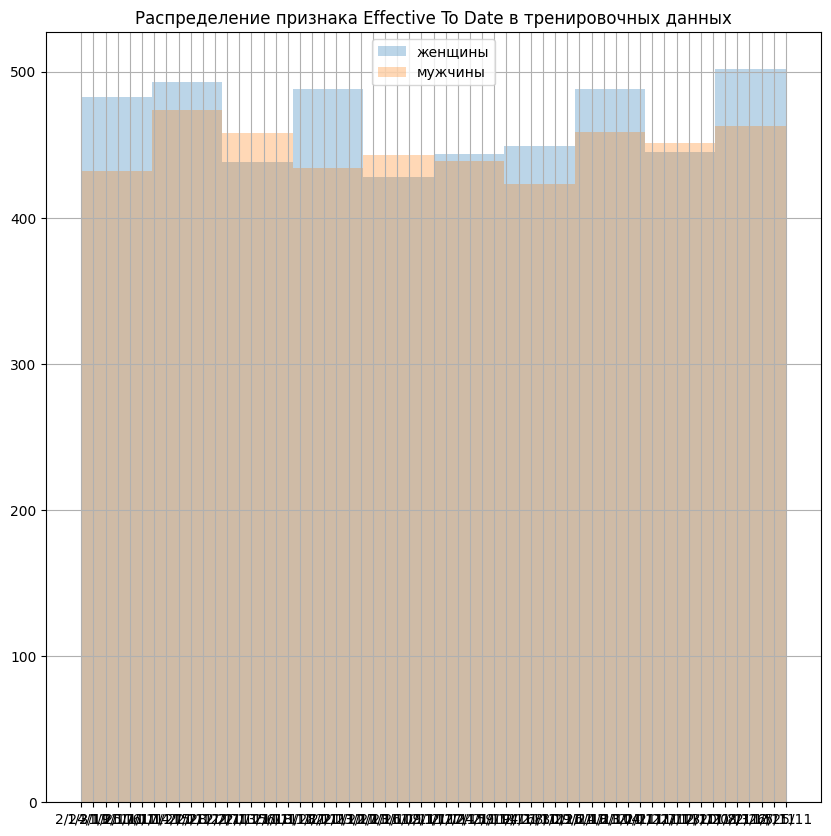

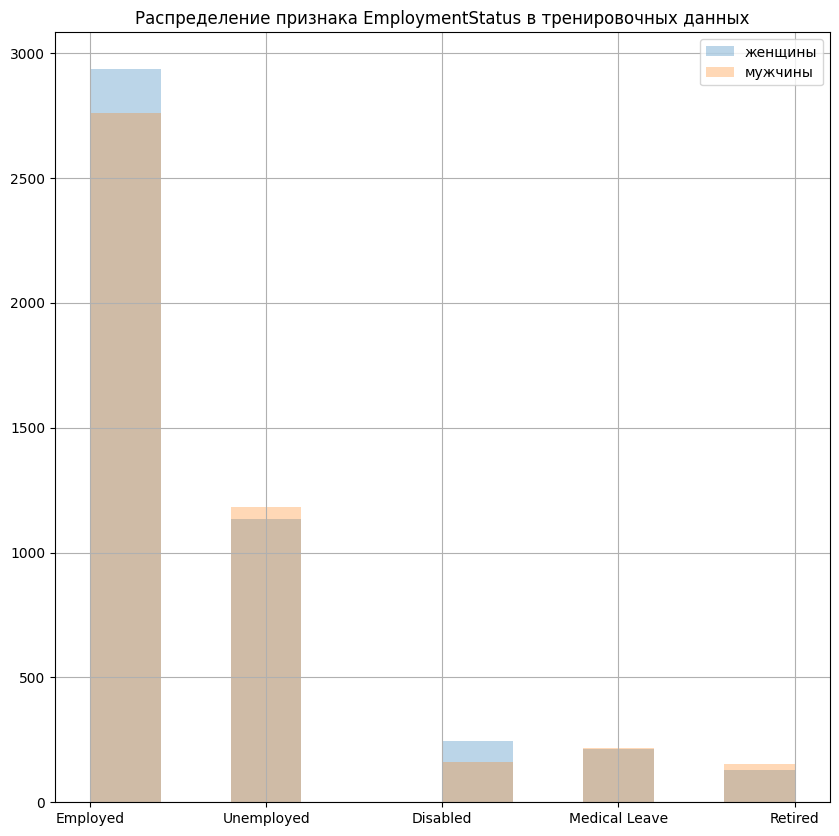

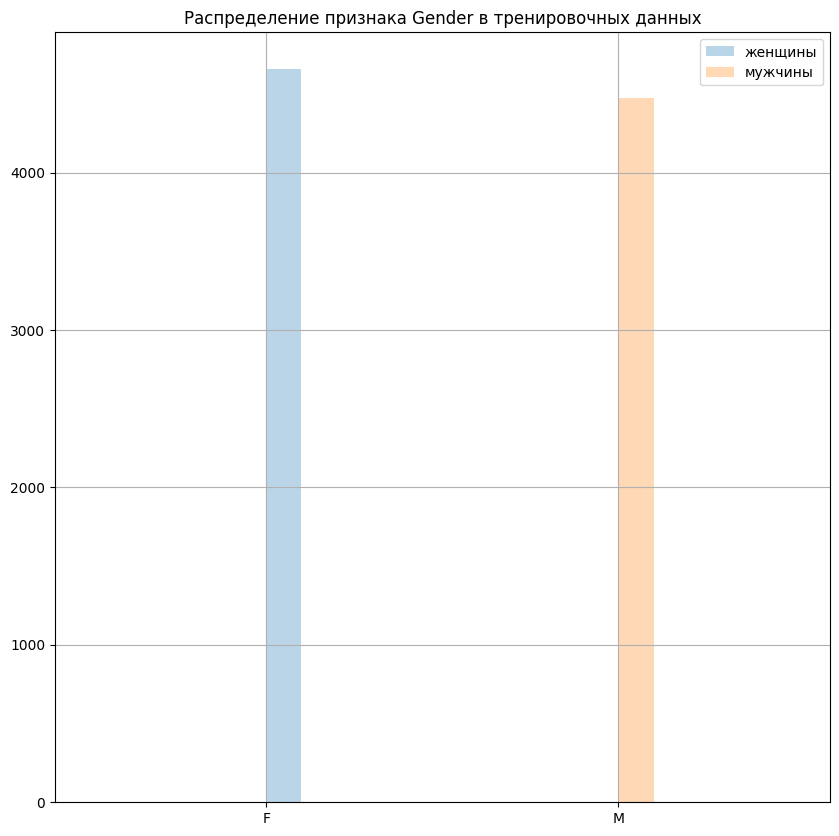

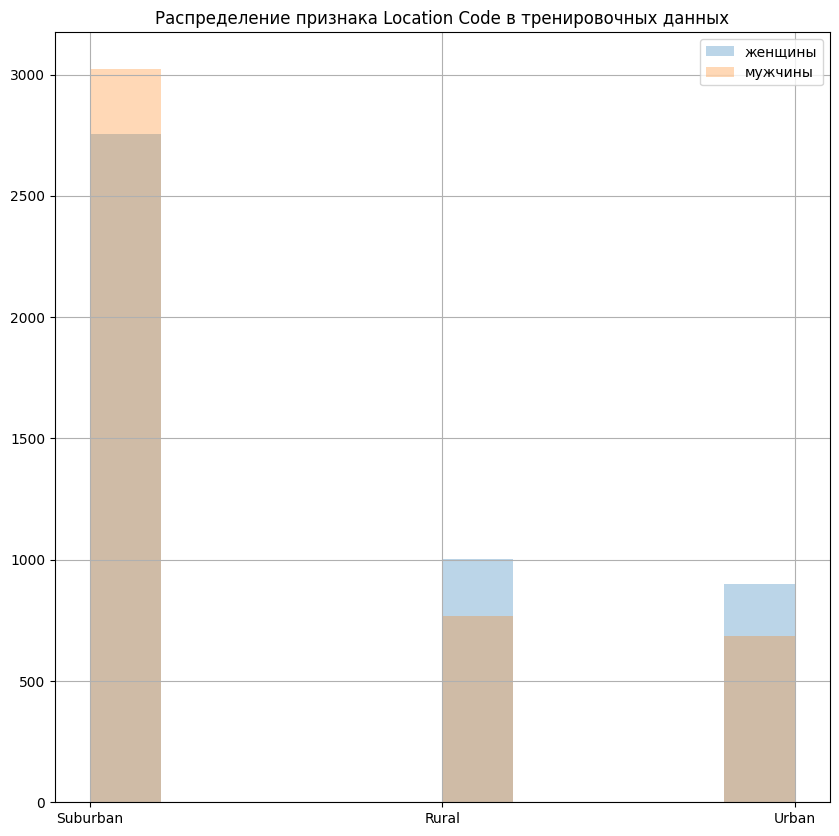

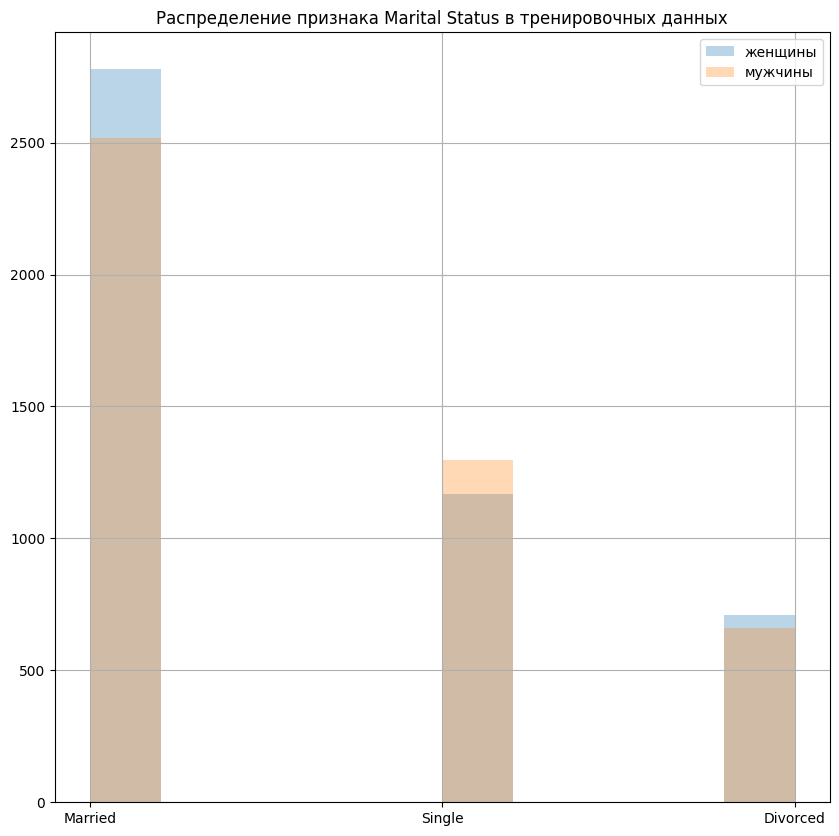

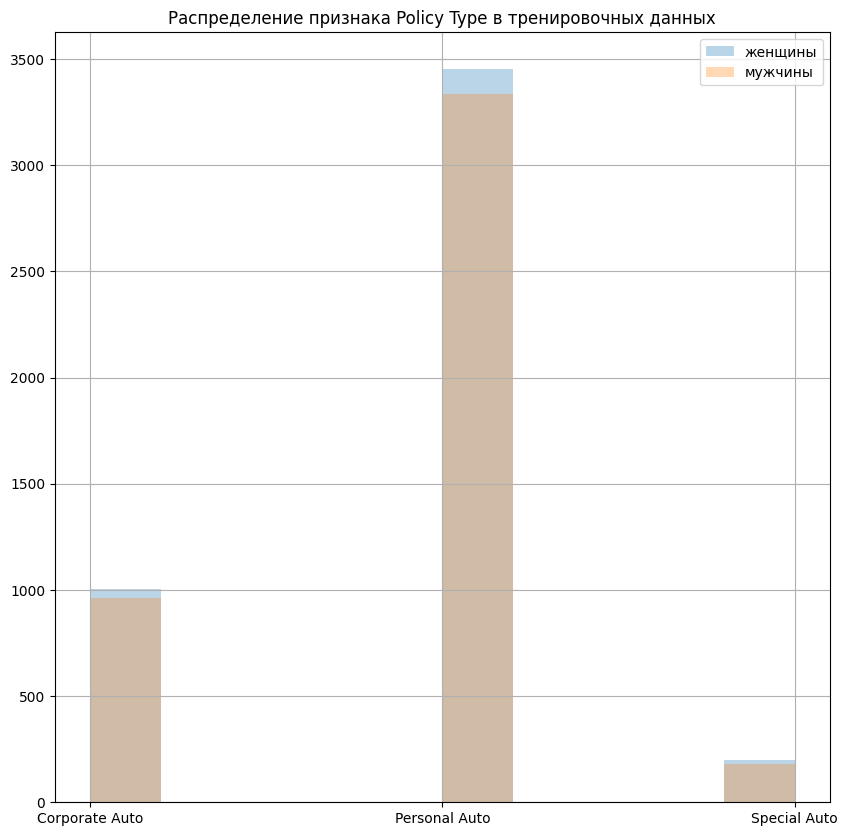

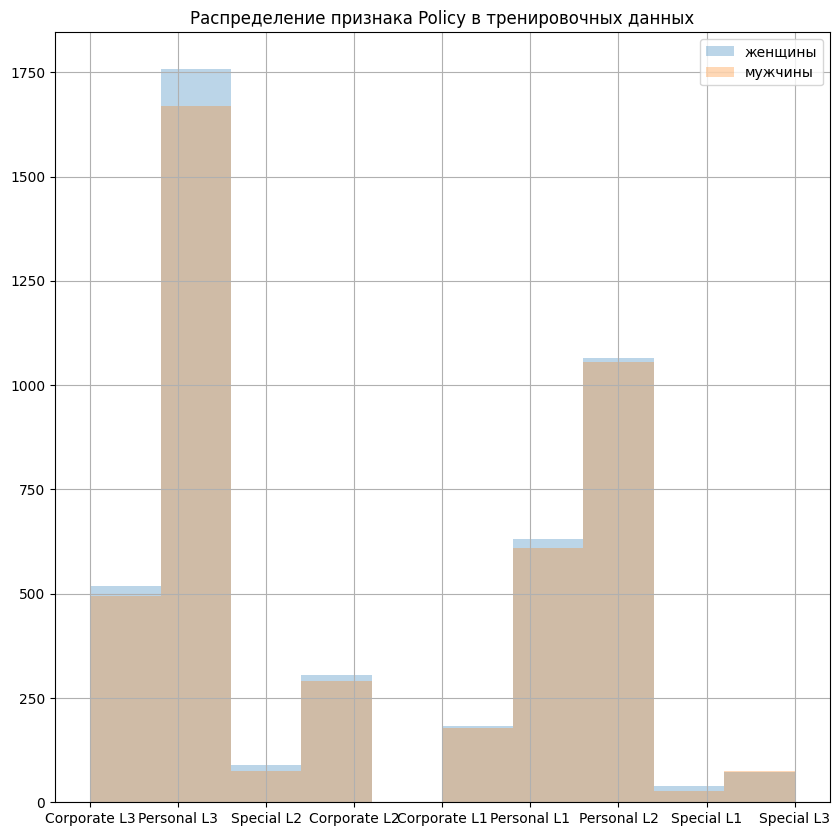

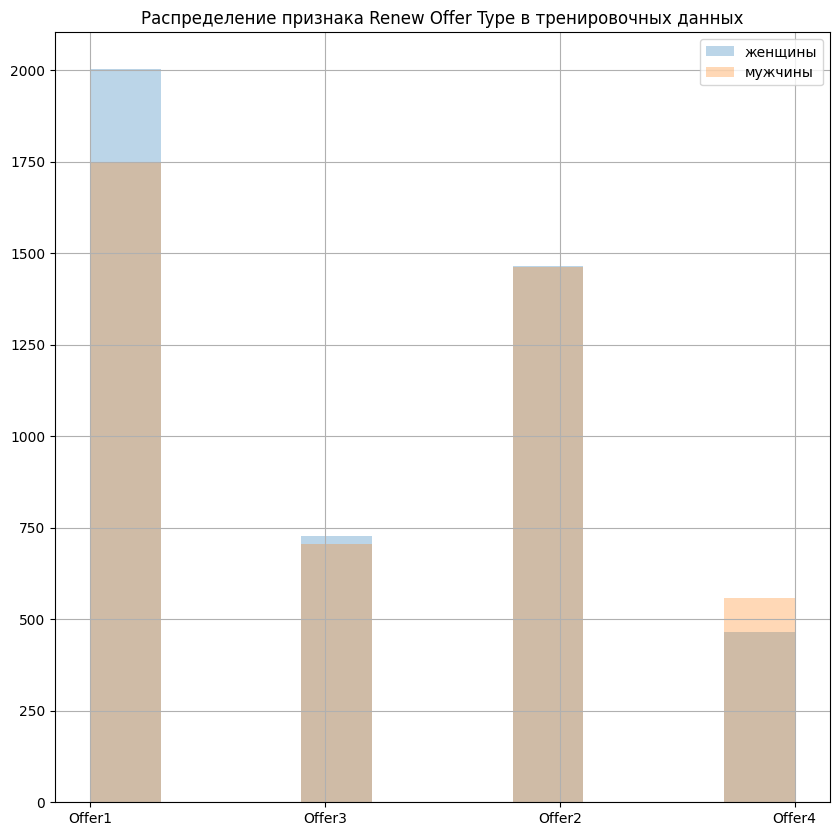

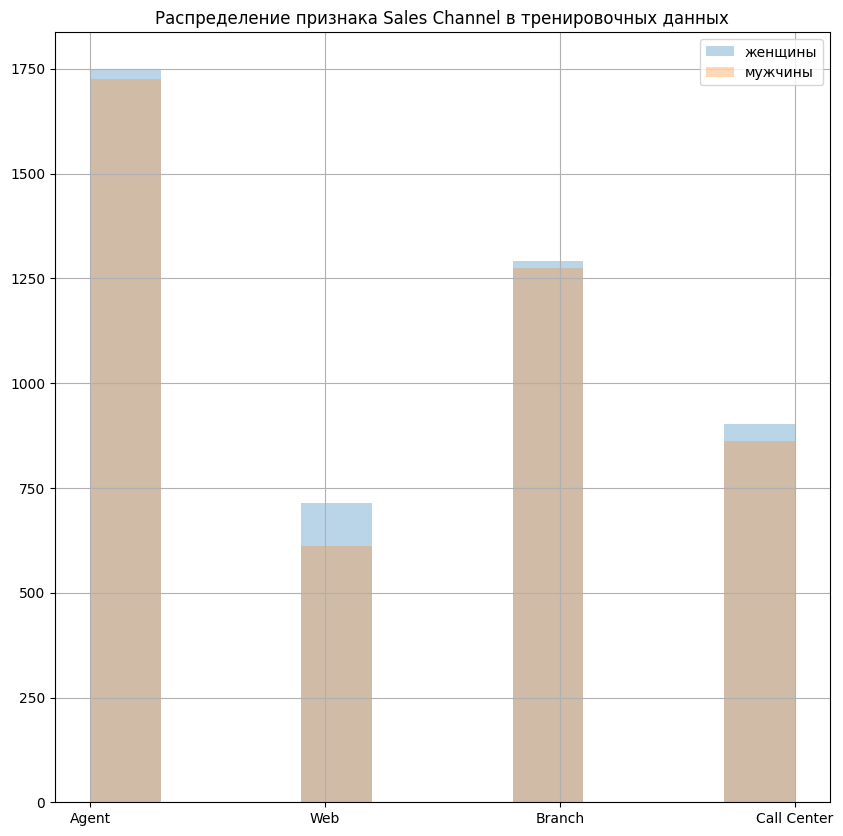

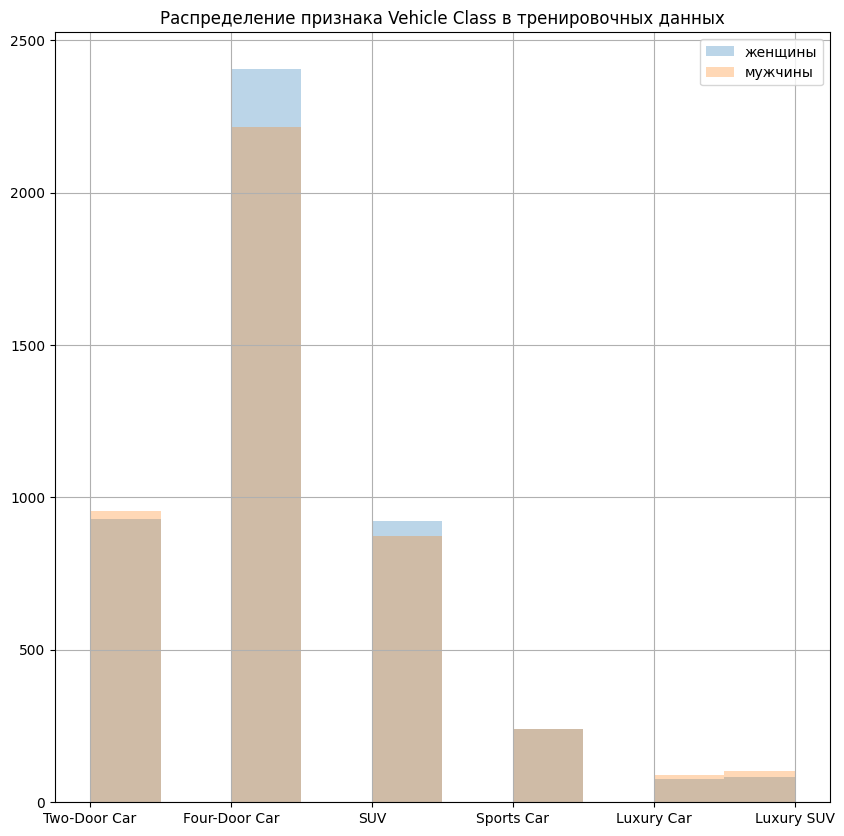

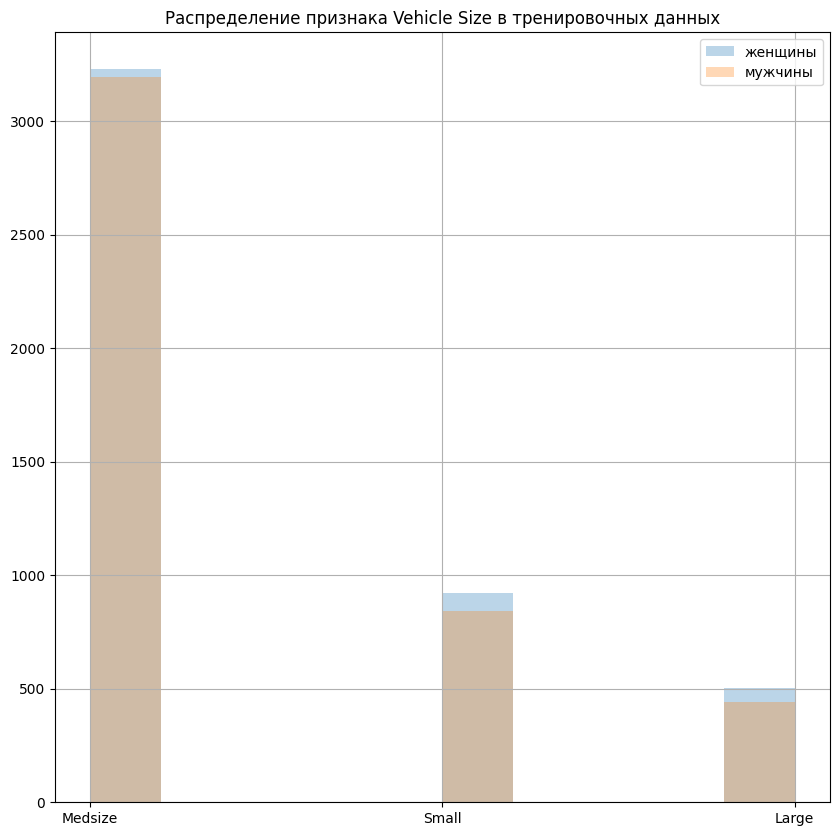

In [14]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    femaly[col].hist(label = 'женщины', alpha=0.3)
    man[col].hist(label = 'мужчины', alpha = 0.3)   
    plt.legend()

## Предобработка признаков

**Важно** Любое изменение признаков нужно делать и на тренировочной и на тестовой выборке

In [15]:
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(X, columns=['Gender', 'Response'])

str_cols = []
cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] not in ('int64', 'float64'):
        str_cols.append(col)

le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])        

X.sample(10)

,Customer,State,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,Marital Status,Monthly Premium Auto,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Gender_F,Gender_M,Response_No,Response_Yes
1204,6399,3,0,1,19,3,21073,1,0,106,...,4,0,0,508.800000,3,2,1,0,0,1
6096,289,0,0,1,7,1,63892,0,1,66,...,5,0,0,90.712257,0,1,1,0,1,0
7962,3562,2,0,2,38,2,17250,2,1,62,...,5,1,2,175.528642,0,1,0,1,1,0
4452,3076,0,1,1,53,4,0,1,2,77,...,5,0,1,554.400000,0,2,0,1,1,0
1346,4744,0,1,1,3,1,58703,0,1,127,...,5,2,0,227.916076,3,2,1,0,1,0
6041,153,4,1,3,6,4,0,1,2,76,...,3,0,0,364.800000,5,1,0,1,1,0
8147,5289,3,2,1,43,1,94757,0,1,112,...,5,2,0,5.453269,0,1,1,0,1,0
497,3507,0,0,3,23,4,0,1,2,70,...,3,0,1,504.000000,0,2,1,0,1,0
5650,726,1,1,1,27,1,56225,1,0,97,...,4,0,0,465.600000,0,2,0,1,1,0
2268,6948,3,0,3,21,1,58577,2,1,110,...,5,0,0,303.872752,3,1,1,0,0,1


In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

## Корреляция признаков

Корреля́ция (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин **(с) Википедия**


**Корреляция** - величина показывающая связь двух и более величин. Существуют различные виды корреляций, мы не будем останавливаться на этом, для желающих разобраться ссылки на материалы в конце урока

**Корреляционная матрица** - квадратная матрица, элементы которой представляют собой корреляцию величин
В библиотеке `pandas.DataFrame` есть атрибут `corr()`, который считает корреляционную матрицу

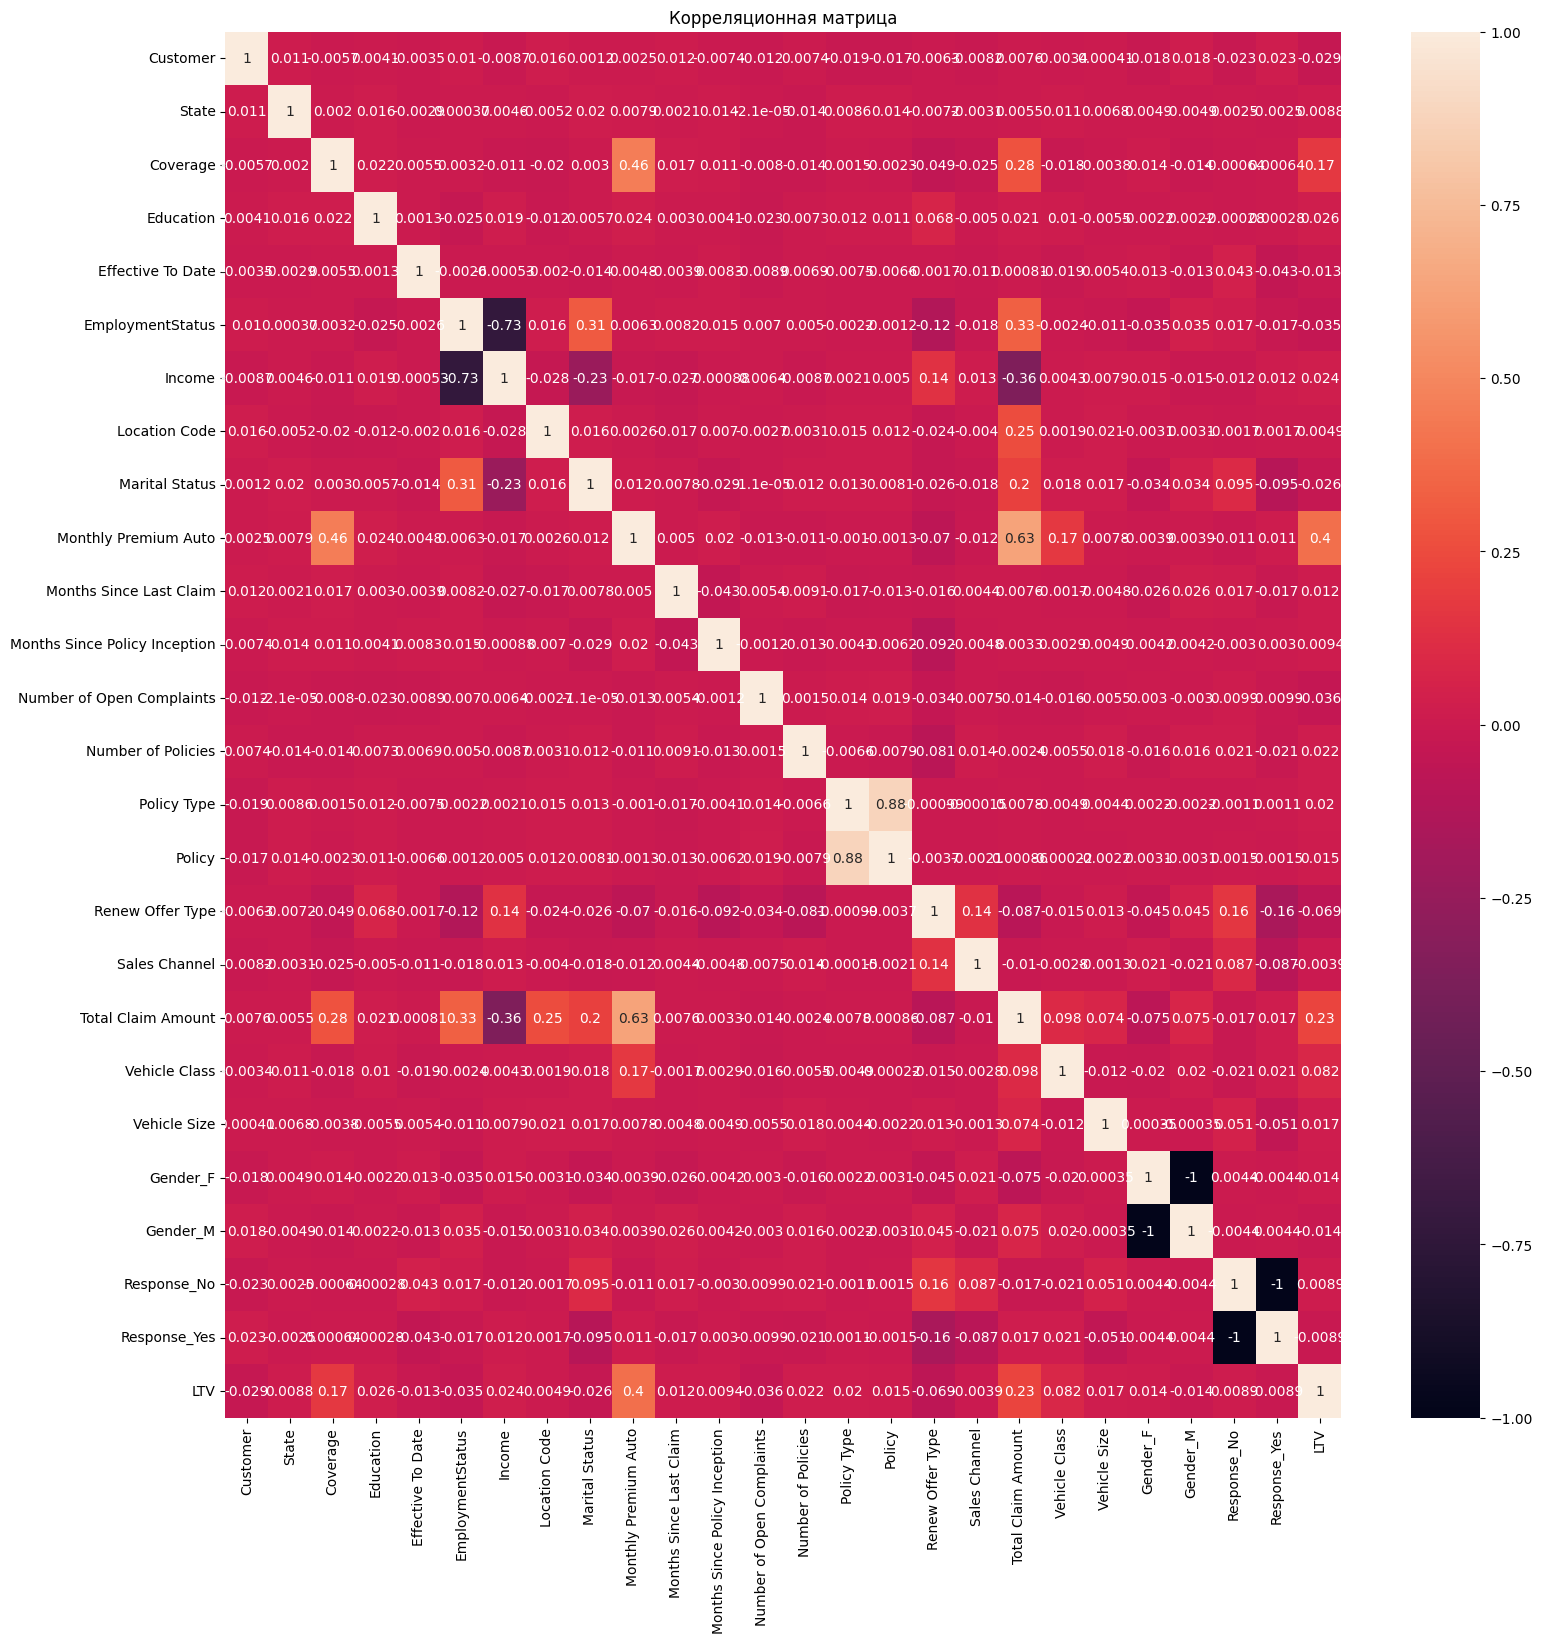

In [29]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['LTV'] = y
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()

# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state = 42, test_size = .2)

print(X_train.shape)
print(X_test.shape)

(7307, 25)
(1827, 25)


In [37]:
# Решающее дерево
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_dec_tree = cross_validate(dec_tree, X_train, y_train, cv = 5, scoring = 'r2')

print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))

Результаты решающего дерева: 0.4440645601350351


In [33]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_ran_for = cross_validate(ran_for, X_train, y_train, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "\\protorsky\work$\Projects\GB\Python\MLearning\DScience\Lesson5\.env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "\\protorsky\work$\Projects\GB\Python\MLearning\DScience\Lesson5\.env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "\\protorsky\work$\Projects\GB\Python\MLearning\DScience\Lesson5\.env\Lib\site-packages\sklearn\ensemble\_forest.py", line 421, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "\\protorsky\work$\Projects\GB\Python\MLearning\DScience\Lesson5\.env\Lib\site-packages\sklearn\ensemble\_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "\\protorsky\work$\Projects\GB\Python\MLearning\DScience\Lesson5\.env\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


Как видно, лучший результат показал случайный лес

## Интерпретация модели и важность признаков

Для того чтобы понять что заставляет пользователей уходить и оставаться, нужно понять влияние признаков. При работе с логистической регрессией можно использовать атрибут `coef_`

**Важно** атрибут `coef_` работает только когда метод `fit()` был явно вызван

In [ ]:
log_reg.fit(X, y)
print("Коэффициенты в линейной регрессии:", log_reg.coef_)

При работе с одним решающем дереве интерпретировать результаты достаточно просто, для этого есть атрибут `feature_importances_` Он показывает долю важности признака на целевую переменную

**Важно** атрибут `feature_importances_` работает только когда метод `fit()` был явно вызван

In [ ]:
dec_tree.fit(X, y)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Некоторые типы моделей (например экстримально случайный лес и все что основано на бустинге) интерпретировать стандартными способами практически невозможно. 

Для интерпретации таких моделей можно использовать библиотеку `shap`, которая работает на основе ядра и вектора Шэпли - важнейших понятий в коалиционной теории игр

In [ ]:
# Раскомментируйте чтобы установить 
#!pip install shap

In [ ]:
import shap
# Загружаем JS шаблоны для визуализации
shap.initjs()

# Обязателен явный вызов метода fit
ran_for.fit(X, y)

print("Обучили модель, переходим к визуализации")
# Интерпретируем предсказания модели при помощи SHAP
explainer = shap.TreeExplainer(ran_for)
shap_values = explainer.shap_values(X)

In [ ]:
# Общий график
shap.summary_plot(shap_values, X, plot_type="bar")